---

_This notebook has been modifie from the **version 1.0** of the cousera course 'Applied Machine Learning in Python
Applied Machine Learning in Python, University of Michigan'. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

### Content

* [Overfitting and Underfitting](#overfitting)
* [Supervised Learning: Datasets](#supervisel)
* [K-Nearest Neighbors: Classification and Regression](#KNN)
* [Linear Regression](#LR) 
    * [Least-Squares](#LR-LS)
    * [Ridge](#LR-Ridge)
    * [Lasso](#LR-Lasso)
    * [Polynomial Regression](#LR-Poli)
    * [Logistic Regression](#LR-LR)
* Linear Classifiers
    * [Support Vector Machines](#SVM)
    * [Multi-Class Classification](#SVMMC)
    * [Kernelized Support Vector Machines](#KSVM)
* [Cross-Validation](#CV)
* [Decision Trees](#DST)


# Applied Machine Learning: Module 2 (Supervised Learning, Part I)
<a id="overfitting"></a> 

<img src="module2_1.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_2.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_3.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_4.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_5.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_6.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_7.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_8.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_9.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_overffiting_1.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_overffiting_2.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_overffiting_3.png" alt="jupyter" style="width: 600px;"/> 

<img src="module2_overffiting_4.png" alt="jupyter" style="width: 600px;"/> 

The effect of reducing K in the k-nearest neighbors classifier is to increase the variance of the decision boundaries, because the decision boundary can be affected by outliers. If there's a point far, far away, it might have, it has much greater effect on the decision boundary in the K=1 case, than it would in the K=10 case, when the votes of nine other neighbors are also needed. And so, you can see that by adjusting the value of K for the k-nearest neighbors classifier, we can control in some sense, the degree of model fitting that's appropriate for a dataset. Now, the actual value of k that works best can only be determined by evaluating on a test set. But the general idea is that as we decrease K for k-NN classifiers, we increase the risk of overfitting. Because, for the reasons I mentioned before, where K=1 for example, we're trying to capture very local changes in the decision boundary that may not lead to good generalization behavior for future data.

## Preamble and Review

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
# In the previous notebook we were having a dictionary istead as {1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

# MinMaxScaler, transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is 
# in the given range on the training set, i.e. between zero and one.
# This transformation is often used as an alternative to zero mean, unit variance scaling.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [5]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Prediction is:',knn.predict(example_fruit)[0])
print('To get the index in', target_names_fruits, 'we need to subract 1')
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Prediction is: 3
To get the index in ['apple', 'mandarin', 'orange', 'lemon'] we need to subract 1
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


### Experimenting to modify plotting code

In [18]:
isinstance(X_train_scaled, (np.ndarray,))

True

In [20]:
X_train_scaled.shape

(44, 4)

In [27]:
X_train_scaled[: , :2]

array([[ 0.49,  0.41],
       [ 0.94,  0.44],
       [ 0.  ,  0.  ],
       [ 0.51,  0.53],
       [ 0.46,  0.41],
       [ 0.72,  0.  ],
       [ 0.52,  0.35],
       [ 0.51,  0.44],
       [ 0.63,  0.03],
       [ 0.48,  0.5 ],
       [ 0.57,  0.15],
       [ 0.8 ,  0.5 ],
       [ 0.48,  0.56],
       [ 0.05,  0.  ],
       [ 0.62,  0.59],
       [ 0.54,  0.53],
       [ 0.65,  0.06],
       [ 0.54,  0.5 ],
       [ 0.54,  0.06],
       [ 0.58,  0.38],
       [ 0.57,  0.44],
       [ 0.8 ,  1.  ],
       [ 0.55,  0.5 ],
       [ 0.63,  0.09],
       [ 0.69,  0.21],
       [ 0.62,  0.03],
       [ 0.58,  0.41],
       [ 0.43,  0.65],
       [ 0.48,  0.35],
       [ 0.8 ,  0.41],
       [ 0.83,  0.94],
       [ 0.05,  0.03],
       [ 0.6 ,  0.53],
       [ 0.55,  0.38],
       [ 0.52,  0.47],
       [ 0.49,  0.47],
       [ 0.46,  0.47],
       [ 0.52,  0.29],
       [ 0.69,  0.09],
       [ 0.11,  0.12],
       [ 0.51,  0.76],
       [ 0.68,  0.06],
       [ 0.88,  0.44],
       [ 1.

In [16]:
isinstance(X_train, (pd.DataFrame,))

True

In [21]:
X_train.shape

(44, 4)

In [22]:
X_train.head()

height  width  mass  color_score
42     7.2    7.2   154         0.82
48    10.1    7.3   174         0.72
7      4.0    5.8    76         0.81
14     7.3    7.6   152         0.69
32     7.0    7.2   164         0.80

In [39]:
### Plot the decision boundaries of the k-NN classifier
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train_scaled, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<img src="module2_supervise_0.png" alt="jupyter" style="width: 600px;"/> 

High dimensional data sets in some sense have most of their data in corners with lots of empty space and that's kind of difficult to visualize. We'll go through some examples later in the course. But the low dimensional examples are still useful so that we can understand things like how a model's complexity changes with changes in some key parameters So for basic regression we'll start with the simple problem that has one informative input variable. One noisy linear output and 100 data set samples. Here's a plot of a data set using scatter plot with each point represented by one dot. The x-axis shows the future value, and the y-axis shows the regression target. To create this we use the make regression function in SK learned data sets. Look bellow.

<a id="supervisel"></a> 
## Datasets

<IPython.core.display.Javascript object>


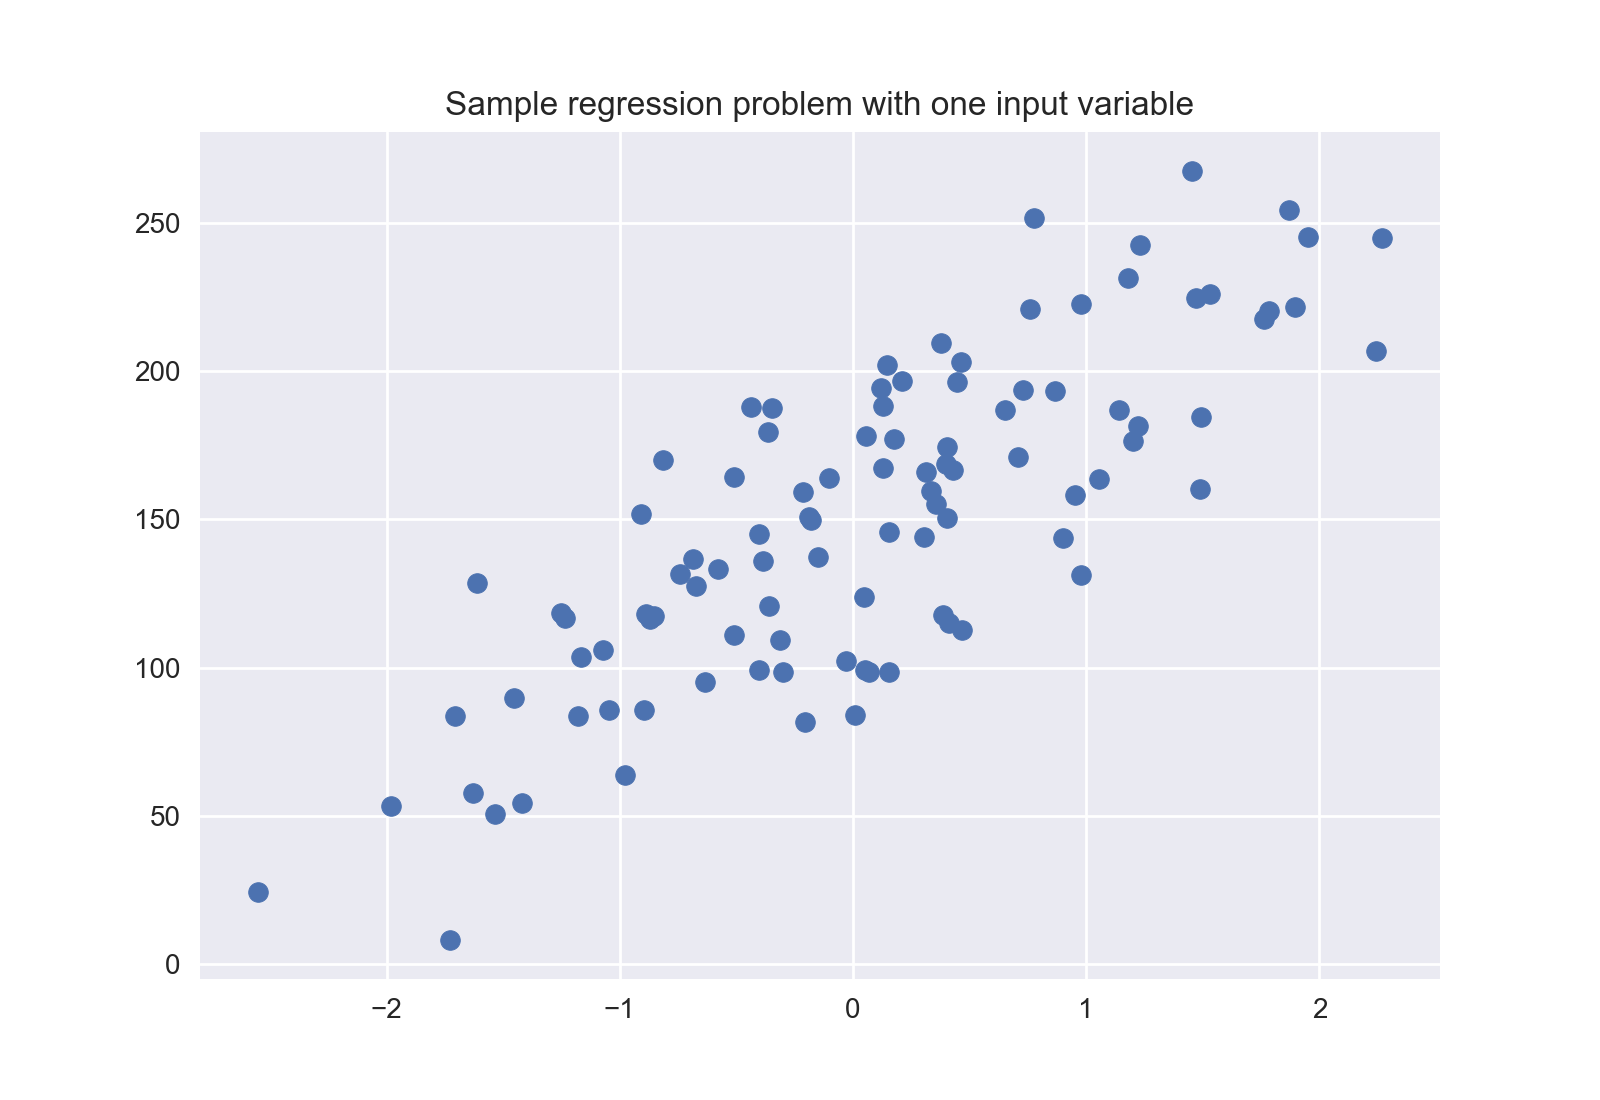

<IPython.core.display.Javascript object>


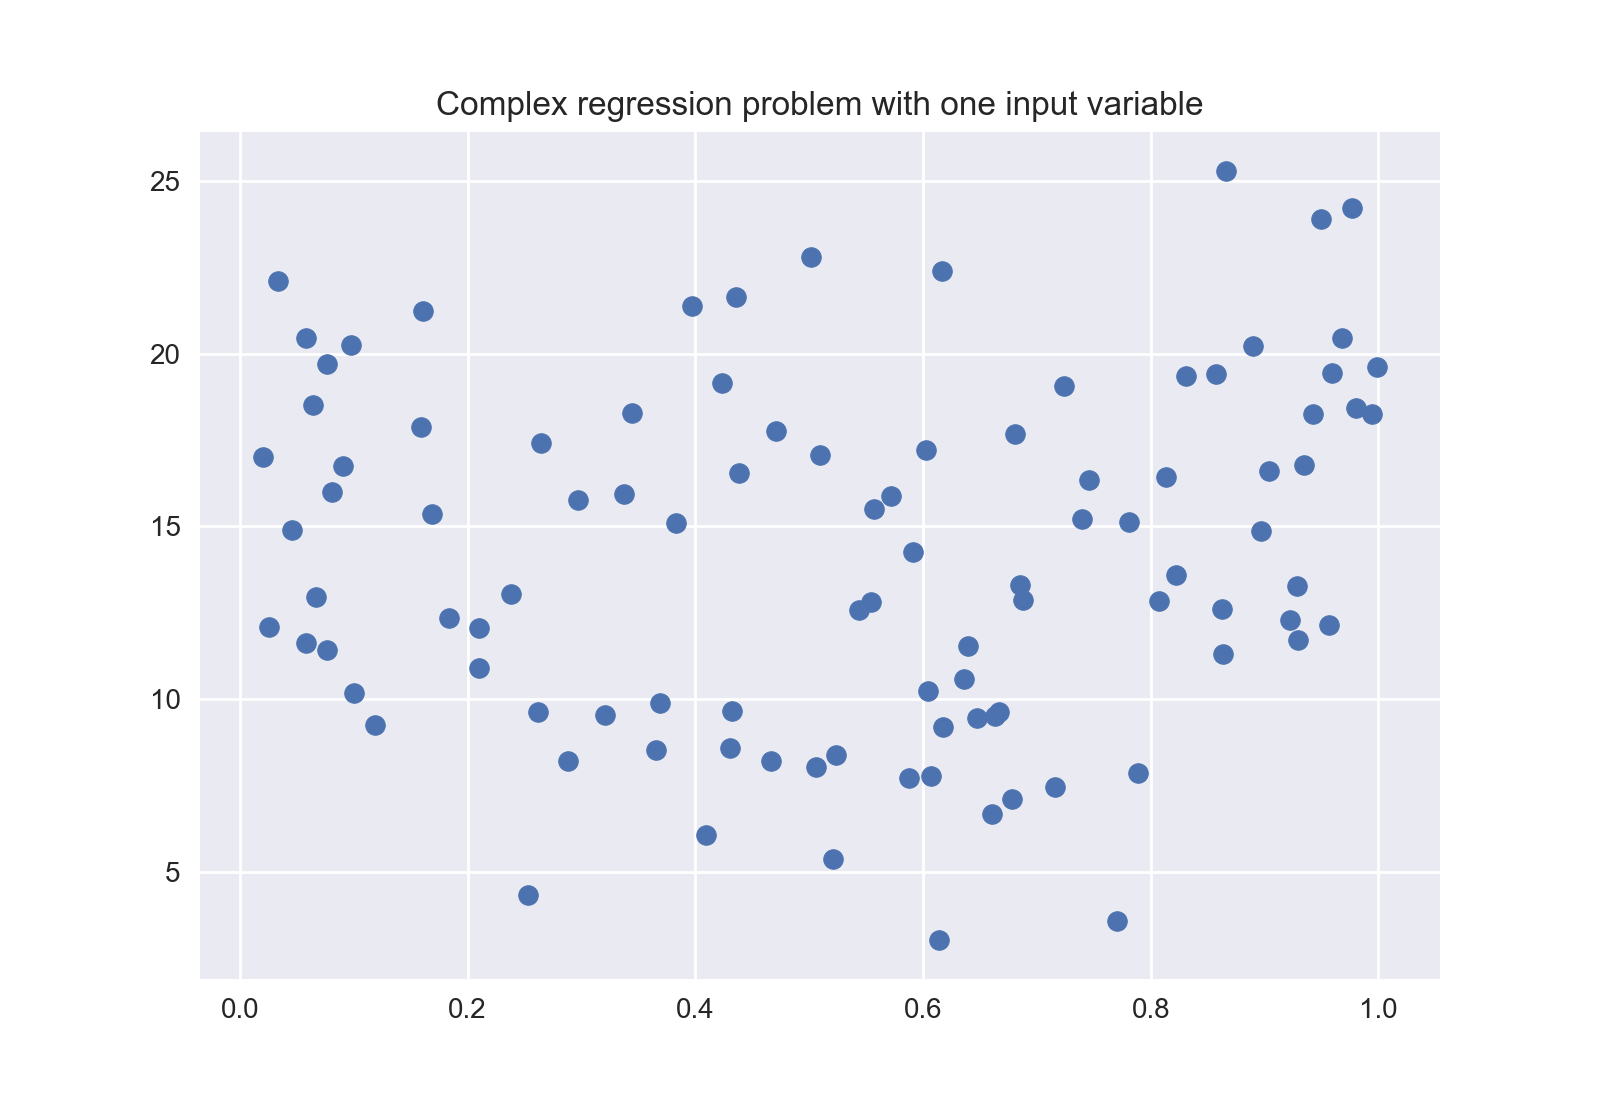

In [41]:
# Both make_blobs and make_classification create multiclass datasets by allocating each class 
# one or more normally-distributed clusters of points
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
# make_regression: Generate a random regression problem.
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
# non-linear relations: make_friedman1 is related by polynomial and sine transforms
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html#sklearn.datasets.make_friedman1
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()


So turning to the notebook, to create this data set we used to make classification function in SK learn data sets. Creating 100 points that roughly group the data samples into one cluster per class, with here a 10% chance of randomly flipping the correct label of any point just to make it a little more challenging the classifier. 

<IPython.core.display.Javascript object>


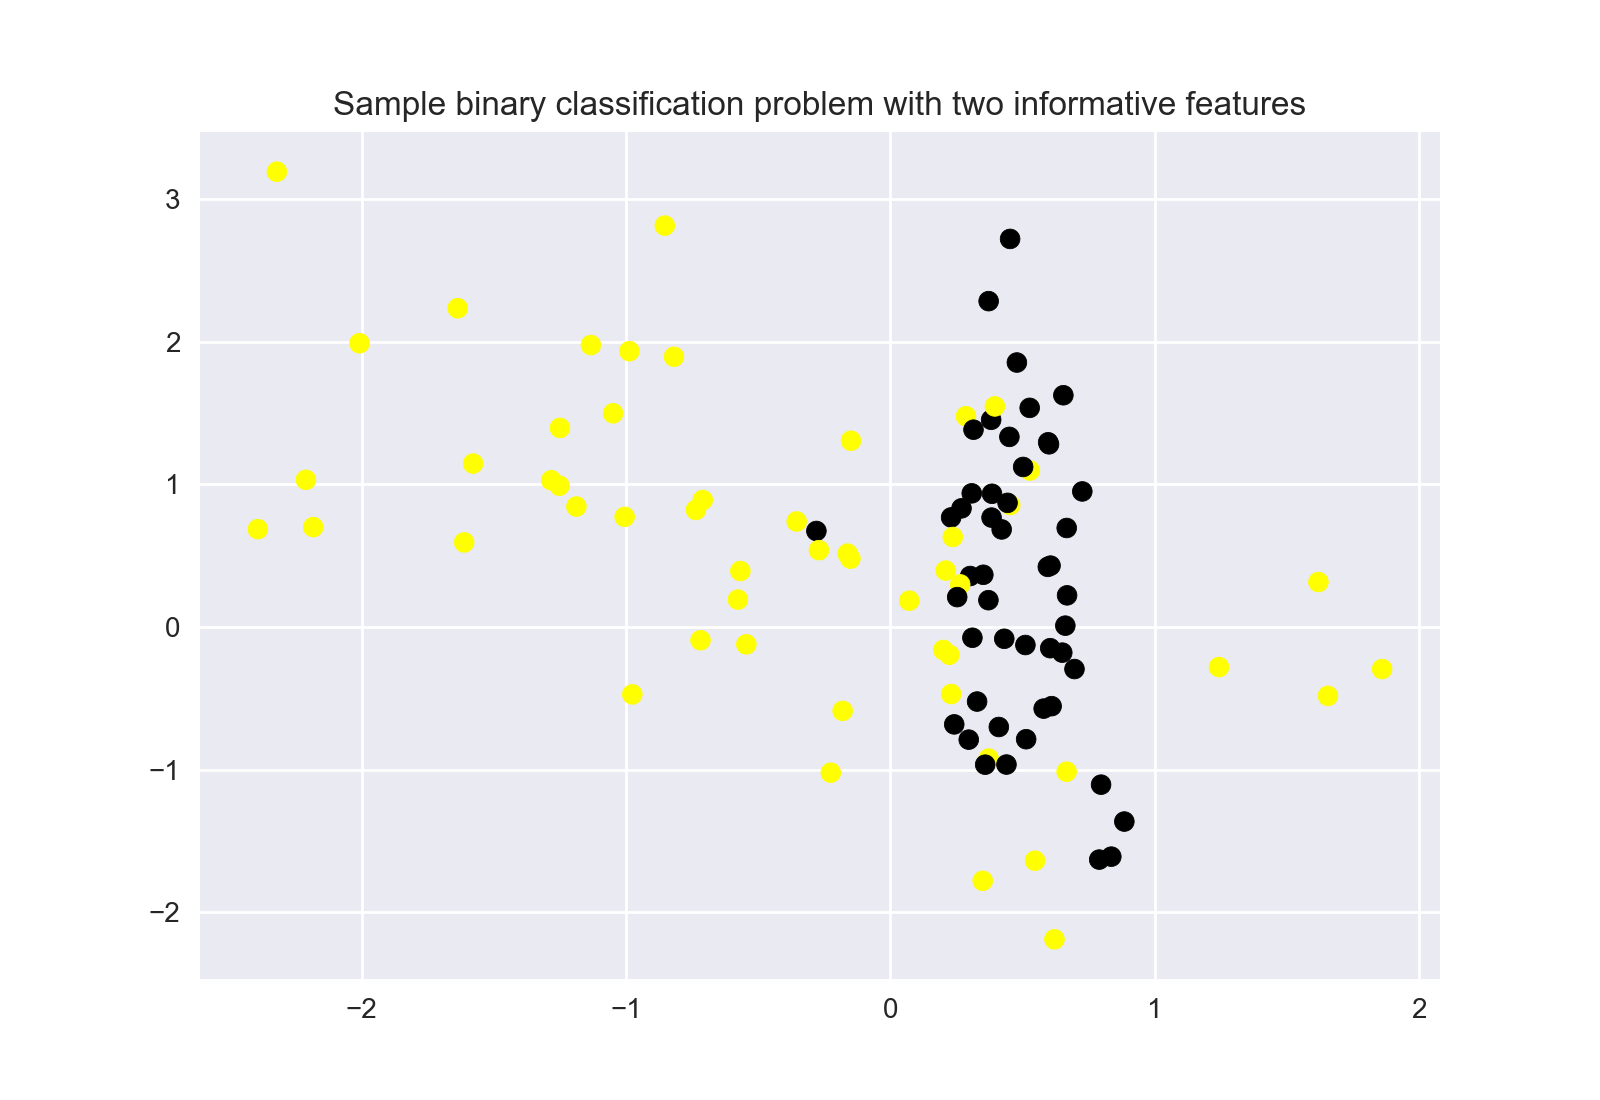

In [42]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

We'll also look at a more complex binary classification problem that uses two features. But where the two classes are not really linearly separable, instead forming into various clusters in different parts of the feature space.

This dataset was created in two steps. First using the make_blobs function in SK learn datasets to randomly generate 100 samples in 8 different clusters. And then by changing the cluster label assigned by make_blobs, which is a number from 1 to 8, to a binary number by converting it using a modulo 2 function. Assigning the even index points to class 0 and odd index points to class 1. To illustrate multi-class classification, we'll use our familiar fruits dataset, which, as you may remember has four features and four possible target labels. 

Labels assigned by blob:  [7 2 0 0 2 6 7 5 1 7 0 4 3 5 3 0 2 5 7 7 4 7 7 1 3 1 4 7 0 0 3 0 4 7 1 1 3
 0 5 7 6 4 2 6 0 2 4 4 0 4 5 2 3 5 5 6 2 3 3 5 5 1 6 3 5 2 3 3 7 0 2 0 7 2
 3 1 4 6 1 4 6 1 2 0 5 4 4 6 6 2 1 3 6 2 1 5 6 1 6 1]
Labels assigned by us as binary:  [1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


<IPython.core.display.Javascript object>


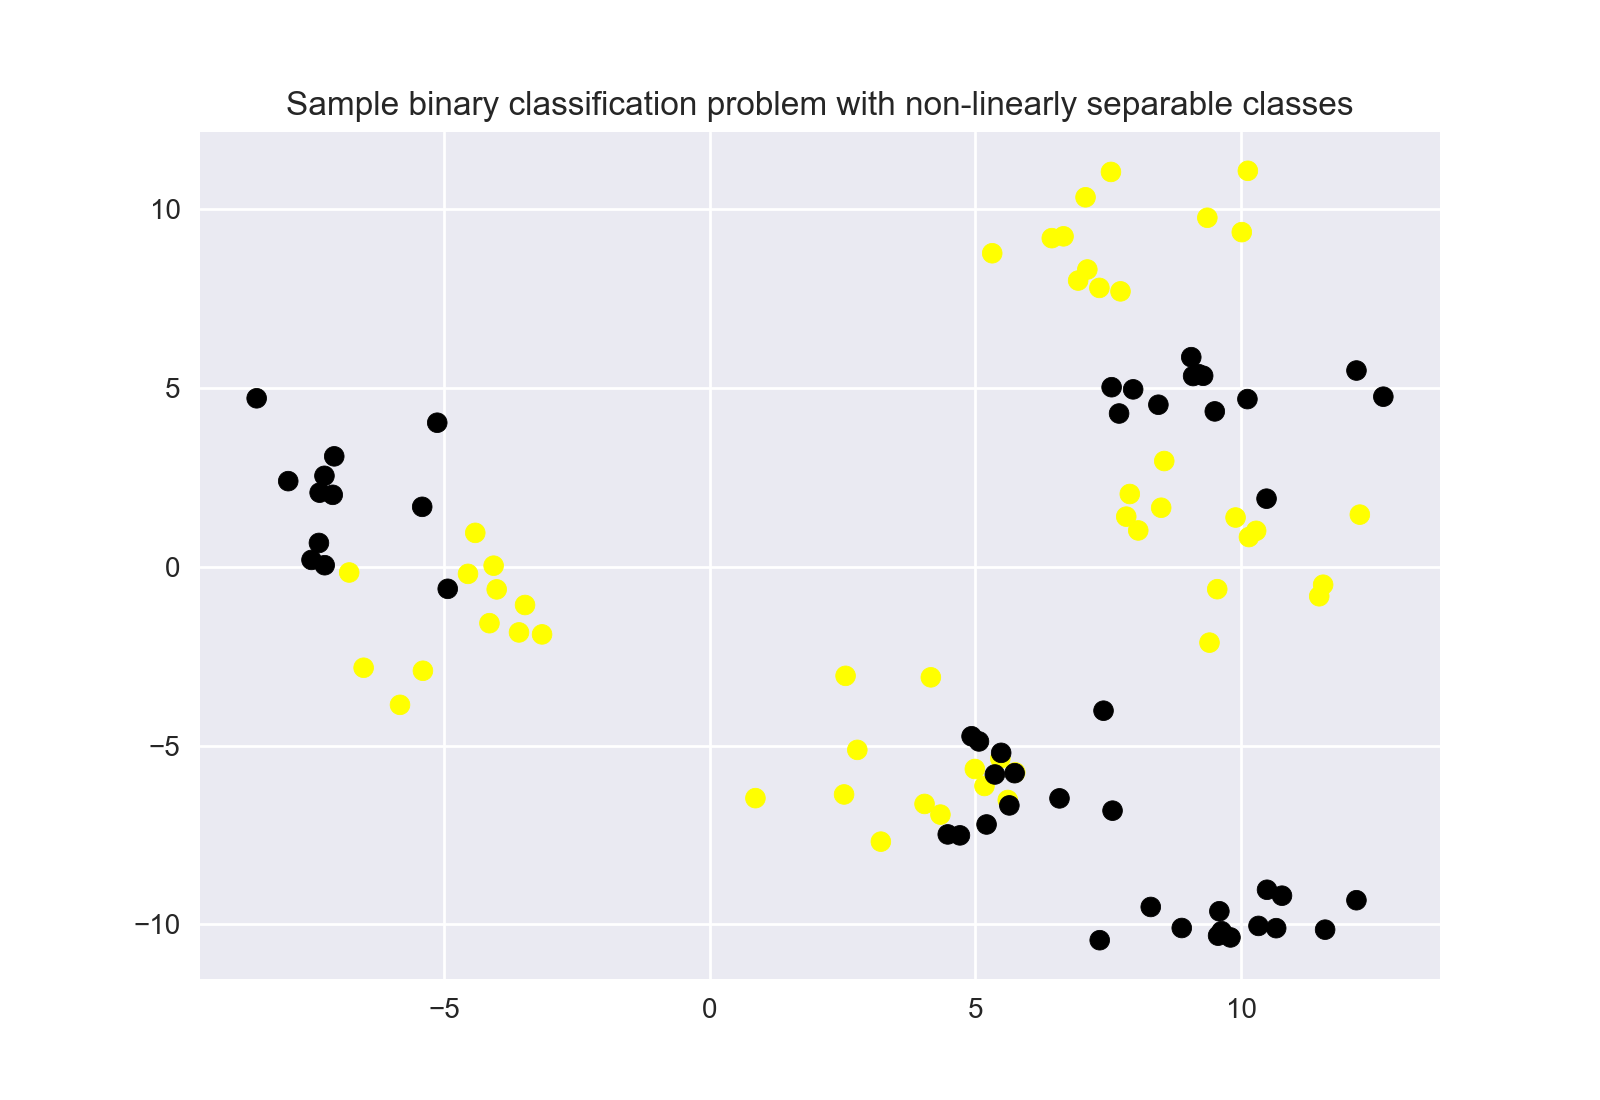

In [45]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
print('Labels assigned by blob: ', y_D2)
y_D2 = y_D2 % 2
print('Labels assigned by us as binary: ', y_D2)
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [30]:
y_train.as_matrix()

array([3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3, 1,
       4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4])

Here on the left, I'm showing the array of scatter plots that we saw in week one that shows the relationship between all possible pairs of features and the class labels, with the distribution of values for each feature along the diagonal. 

<img src="module2_supervise_1.png" alt="jupyter" style="width: 600px;"/> 

To illustrate a real-world regression problem, we'll use a dataset derived from the communities and crime dataset in the UCI repository. Our dataset uses a subset of the original features and target values. Which were originally created from combining several U.S. government data sources, like the U.S. census. Each data instance corresponds to a particular geographic area, typically a town or a region of a city. Our version of this dataset has 88 features that encode various demographic and social economic properties of each location. With 1994 location data instances. 
<img src="module2_supervise_2.png" alt="jupyter" style="width: 600px;"/> 

In [46]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<a id="KNN"></a> 

## K-Nearest Neighbors
<img src="KNN_regclass_1.png" alt="jupyter" style="width: 600px;"/> 

Here's how a k-Nearest Neighbor Classifier using only one nearest neighbor, that is with k equal to 1, makes these predictions for the simple binary synthetic dataset. So as you might recall from week one where we applied a nearest neighbors classifier to our multi-class fruit dataset. Here we're applying the nearest neighbors classifier to our simple binary classification problem. Where the points in class zero are labeled with yellow dots and the points in class one are labeled with black dots.

And just as we did for the week one problem with fruit classification, here we're also showing how the entire feature space is broken up into different decision regions according to the predictions that the k-Nearest Neighbor Classifier would make at each point in the decision space. So for example, a point out here in the yellow region represents a point that the classifier would classify as class zero. And a point, let's say, over here, the classifier would classify as class one. 

So because this is a one nearest neighbors classifier, to make a classification prediction for any given query point, the Classifier simply looks back into its trading set. So these points here represent all the points on the training set. So for any given point, let's say here, The Classifier would simply find the training point that's closest, namely this one, and assign the predict a class to simply the class of the nearest point in the training set. Likewise, if we have a point over here. 

The nearest point in the training says actually this point right here that has a class zero label and so that point would get assigned a class zero. And in fact, this whole region right here represents all the points that are closer to the class zero training point than any of the other class one training points. So this whole region here represents a one nearest neighbors prediction of class zero. So the k-Nearest Neighbor's Classifier with k = 1, you can see that the decision boundaries that derived from that prediction are quite jagged and have high variance. 

This is an example of a model, classification model, it has high model complexity. And in fact, you can see that the one nearest neighbors classifier is over-fitting the training data in this case. It's trying to get correct predictions for every single training point while ignoring the general this trend between the two classes, namely that most of the yellow points are in this side of the future space and most of the black points are on this side. 

So the one nearest neighbor's classifier can be said to be over-fitting in this case. 
<img src="KNN_regclass_2.png" alt="jupyter" style="width: 600px;"/> 

And here is what happens when we increase k from 1 to 11. Now the classifier must combine the votes of the 11 nearest points, not just 1. So single training data points no longer have as dramatic an influence on the prediction.  The result is a much smoother decision boundary, which represents a model with lower model complexity where the decision boundary has much less variance. 

Actually if we increased k even higher to be the total number of points in the training set, the result would be a single decision region where all predictions would be the most frequent class in the training data. As we saw for the fruit data set, k-Nearest Neighbor Classifiers can be applied to any number of classes, not just 2. 
<img src="KNN_regclass_3.png" alt="jupyter" style="width: 600px;"/> 

### Classification

<IPython.core.display.Javascript object>


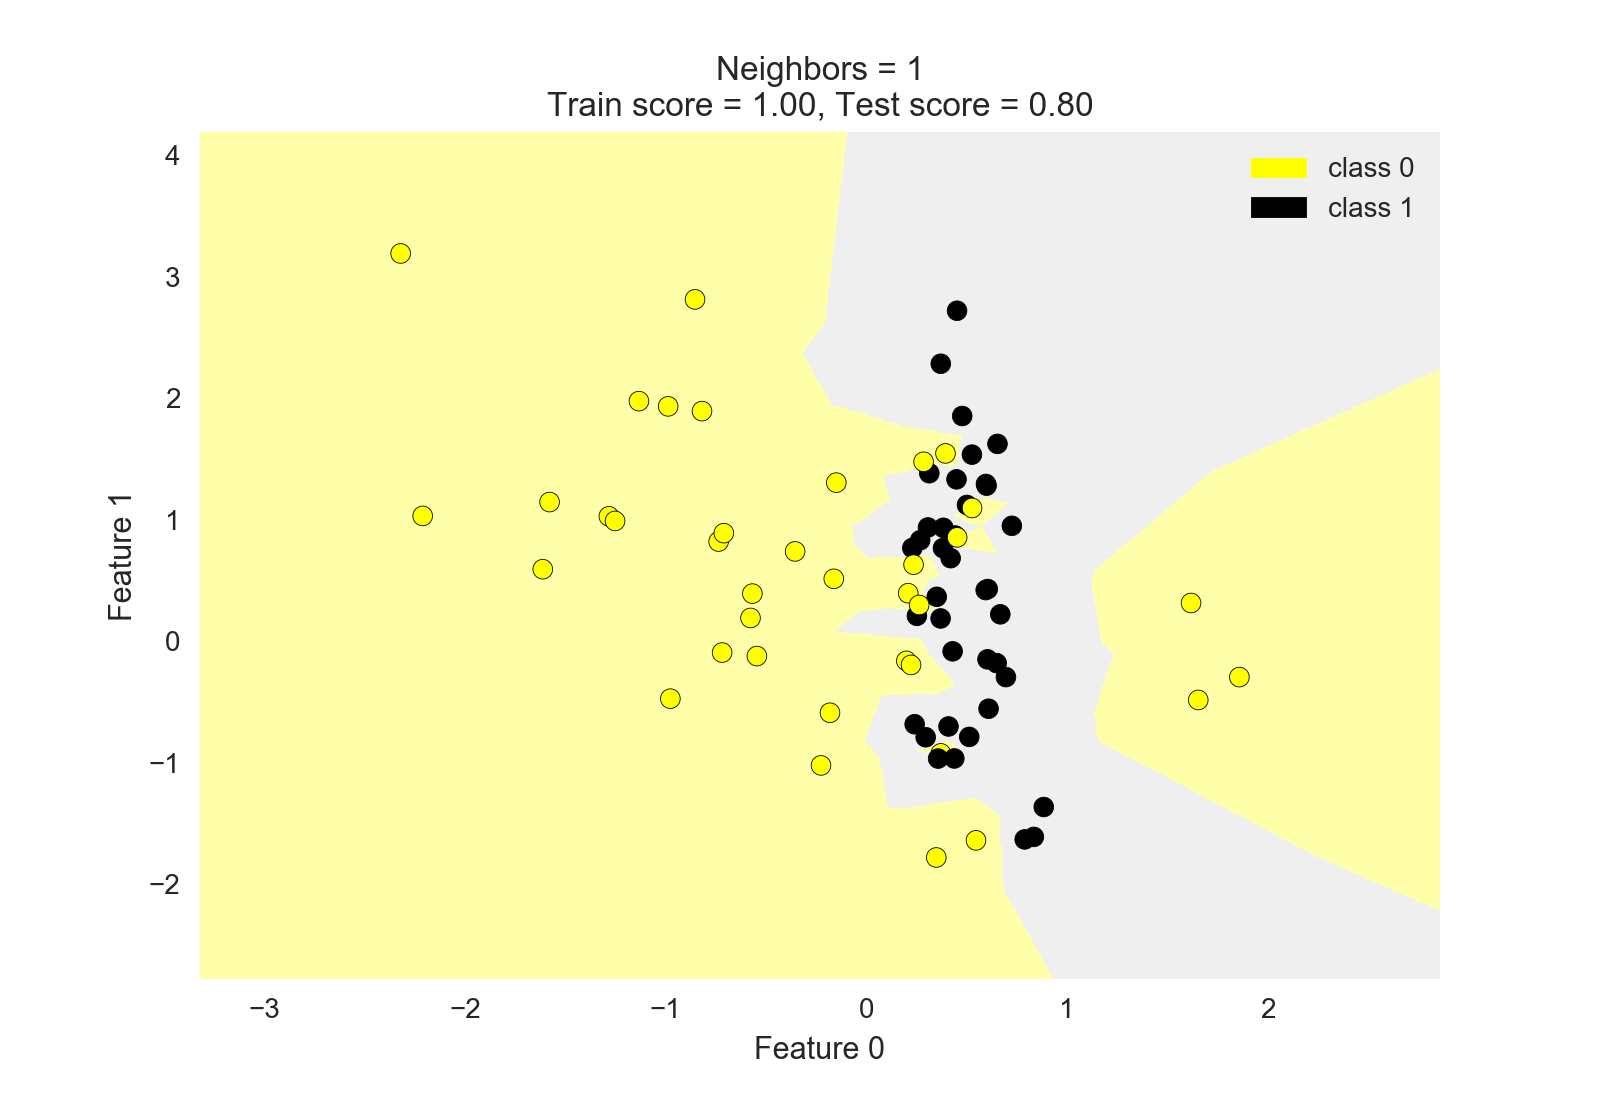

<IPython.core.display.Javascript object>


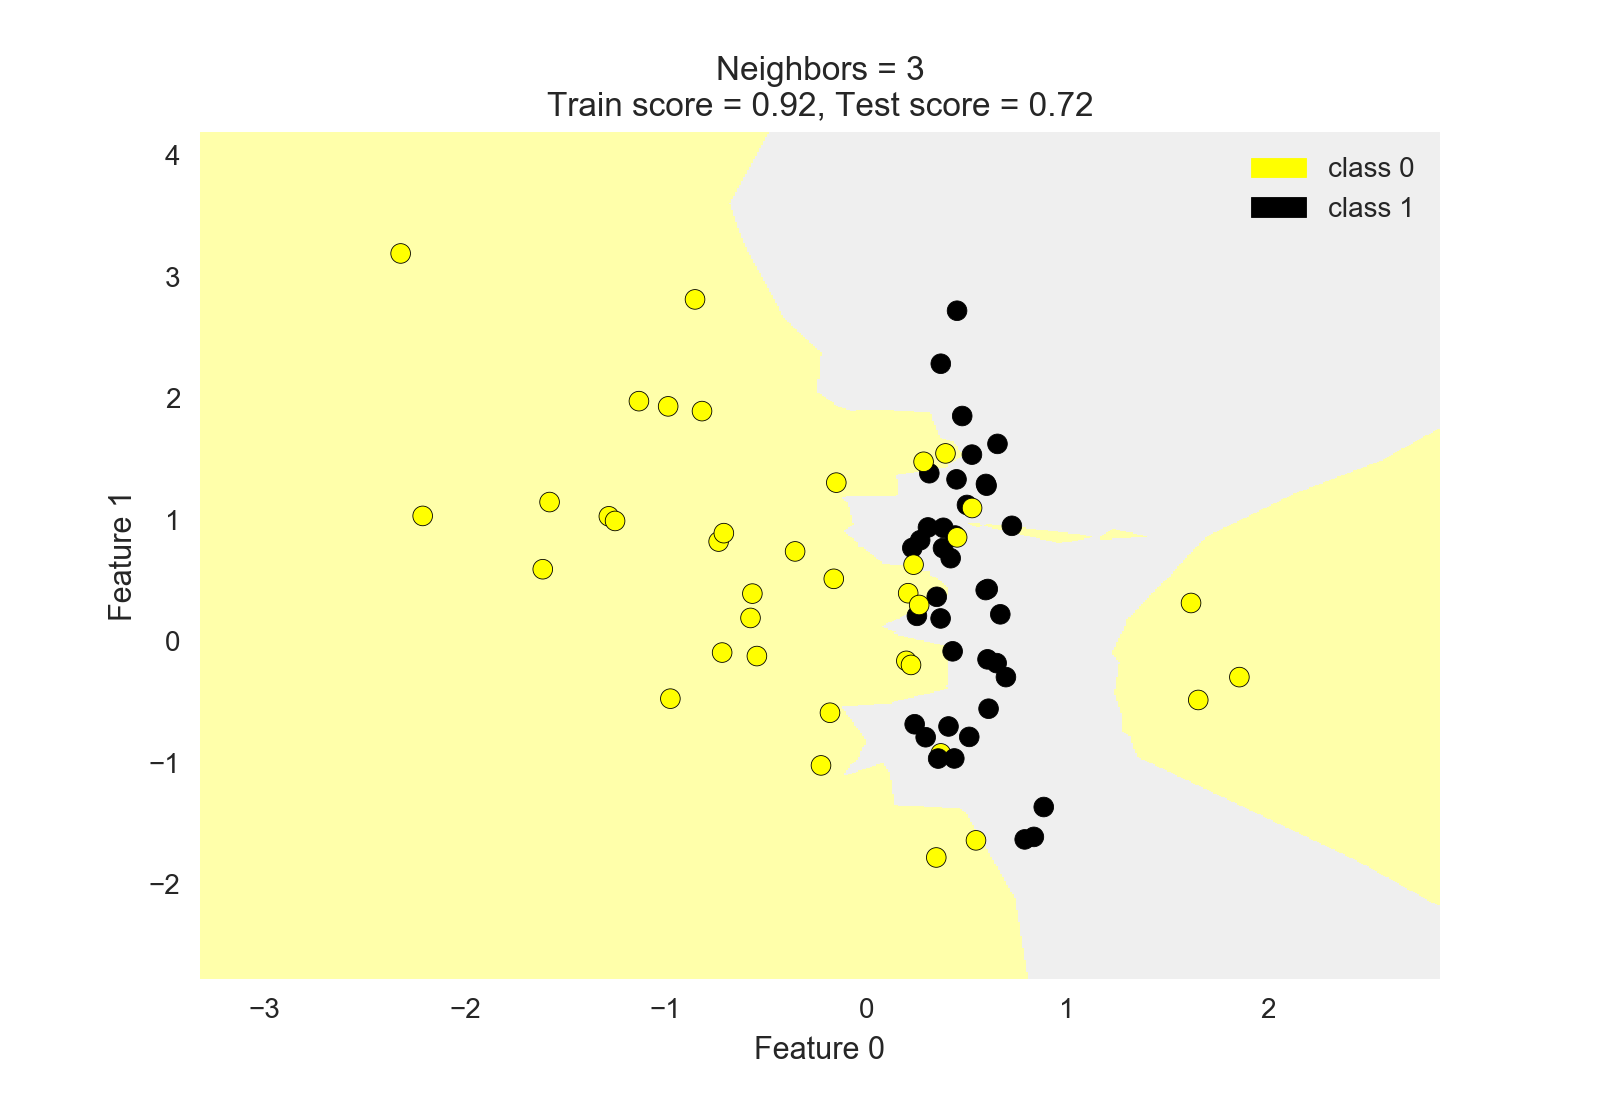

<IPython.core.display.Javascript object>


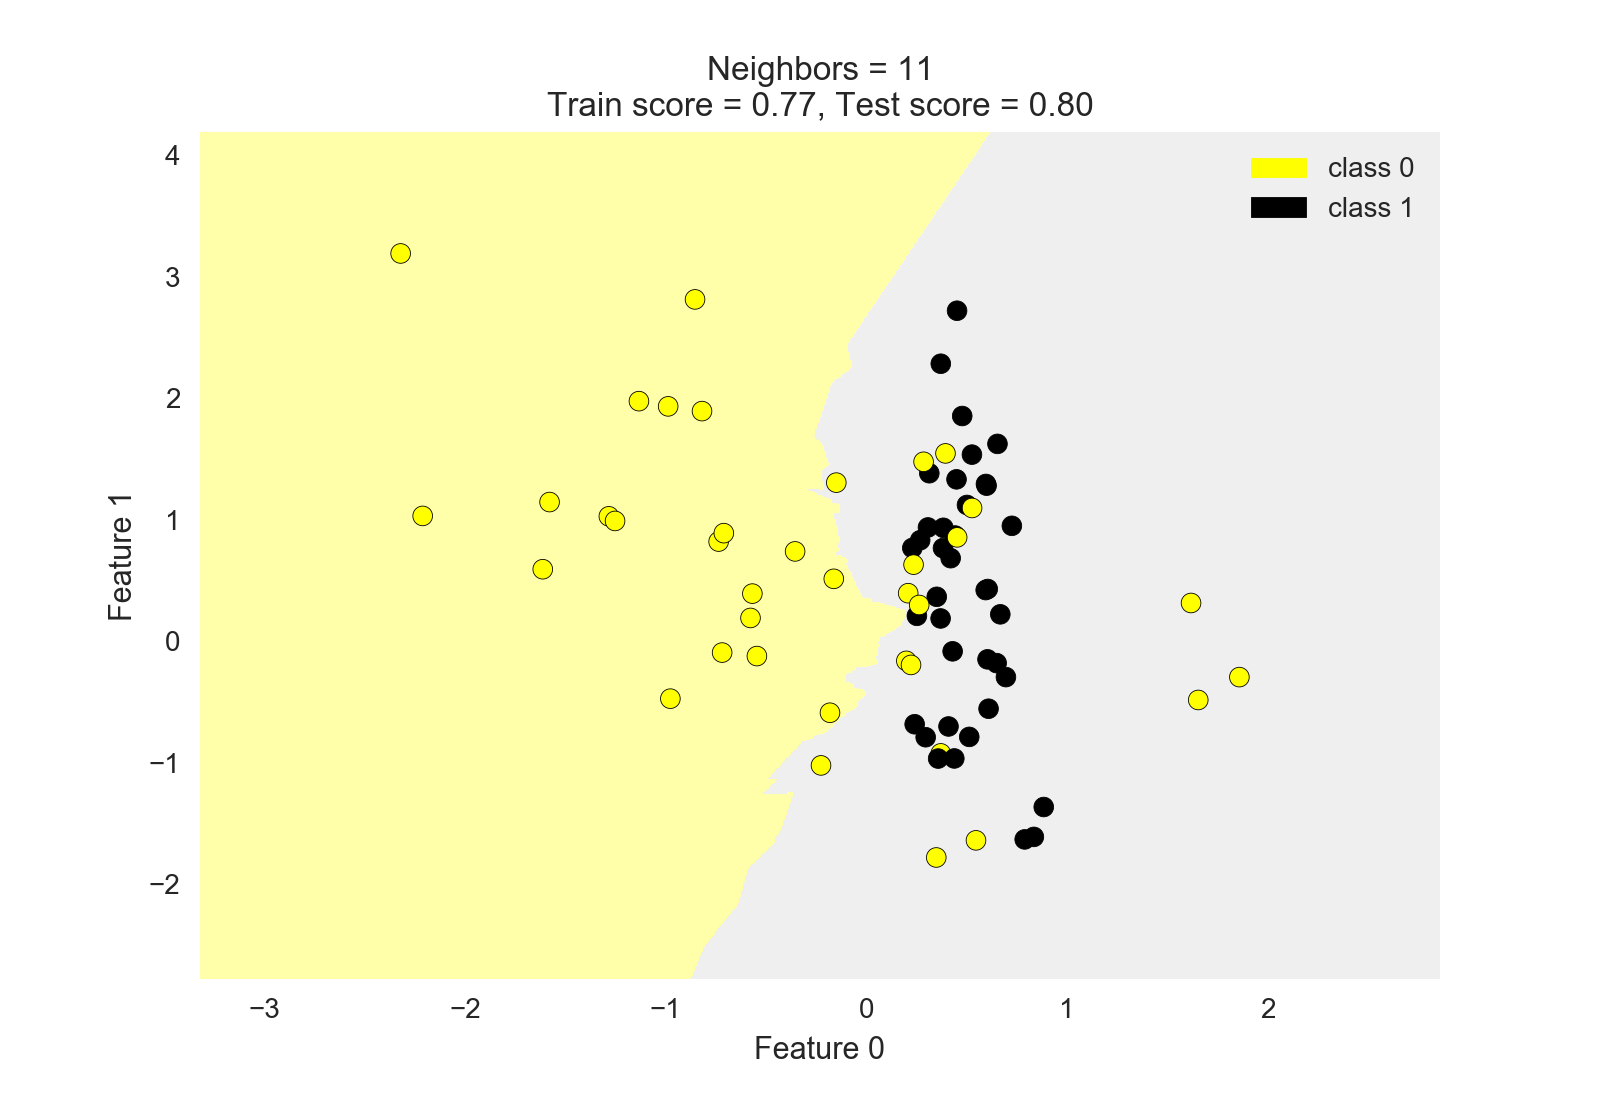

In [47]:
from adspy_shared_utilities import plot_two_class_knn
# X_C2, y_C2 from above binary classification two features
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

Improving the score for the test data is indicating that this simple model is much more effective at ignoring minor variations in training data. And instead capturing the more important global trend in where the classes tend to be located with the best overall generalization performance as a result. 

### Regression

The nearest neighbors approach isn't useful just for classification. You can use it for regression too. So here are three plots that show the same simple regression problem with one input feature and the corresponding target values in the training data. 

<img src="KNN_regclass_4.png" alt="jupyter" style="width: 600px;"/> 

The left most plot here, this one, shows just the original training data points. And the middle and right plots show the predictions made by k and n regression algorithm, when k = 1 and k = 3. So in these plots, you can see the training points are actually in green. These green circles are the training points and the blue triangles are the output of the k-nearest neighbor regression for any given input value of x. So for example the knn regression prediction for this point here is this y value here. 

So how did the nearest neighbors regressor compute this value. Well I did it in similar way to what we saw for classification.  So if the query point we're interested in is predicting value associated with this x value, we simply find the training point that has the X value that's closest to this query point. So in this case, that would be this training point. And because this is a one nearest neighbor problem, we simply take the target value associated with this training point and use that as the output target for the query point. 

Similarly, if this were the query point here then the nearest neighbor in the training set would be this point here.  And so the output prediction for this particular X-value would be the target value of the nearest neighbor or this value that's just above 100. And so, if we do that for all these different X values, we'll get these different predictions using the one nearest neighbor approach. Similarly, if we look at the k = 3 case, where we now look at three nearest neighbors, let's take this example here of -1.25, let's say. Well, what are the three training points that have x values closest to -1.25? They would be this training point, that training point and this training point. 

Now with regression, **what we do is instead of taking a majority vote, we don't have class values here as targets, we have continuous values. So we can average these three target values. And if we do that, we find that the output, when the query point is this X-value, is going to be the average of the y-values of the three nearest training points**, or this value here. Similarly, if we have a query point that is here. Then the three nearest neighbor points are here, here and here. And the average target value of these three training points is something like this (watch video). 

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


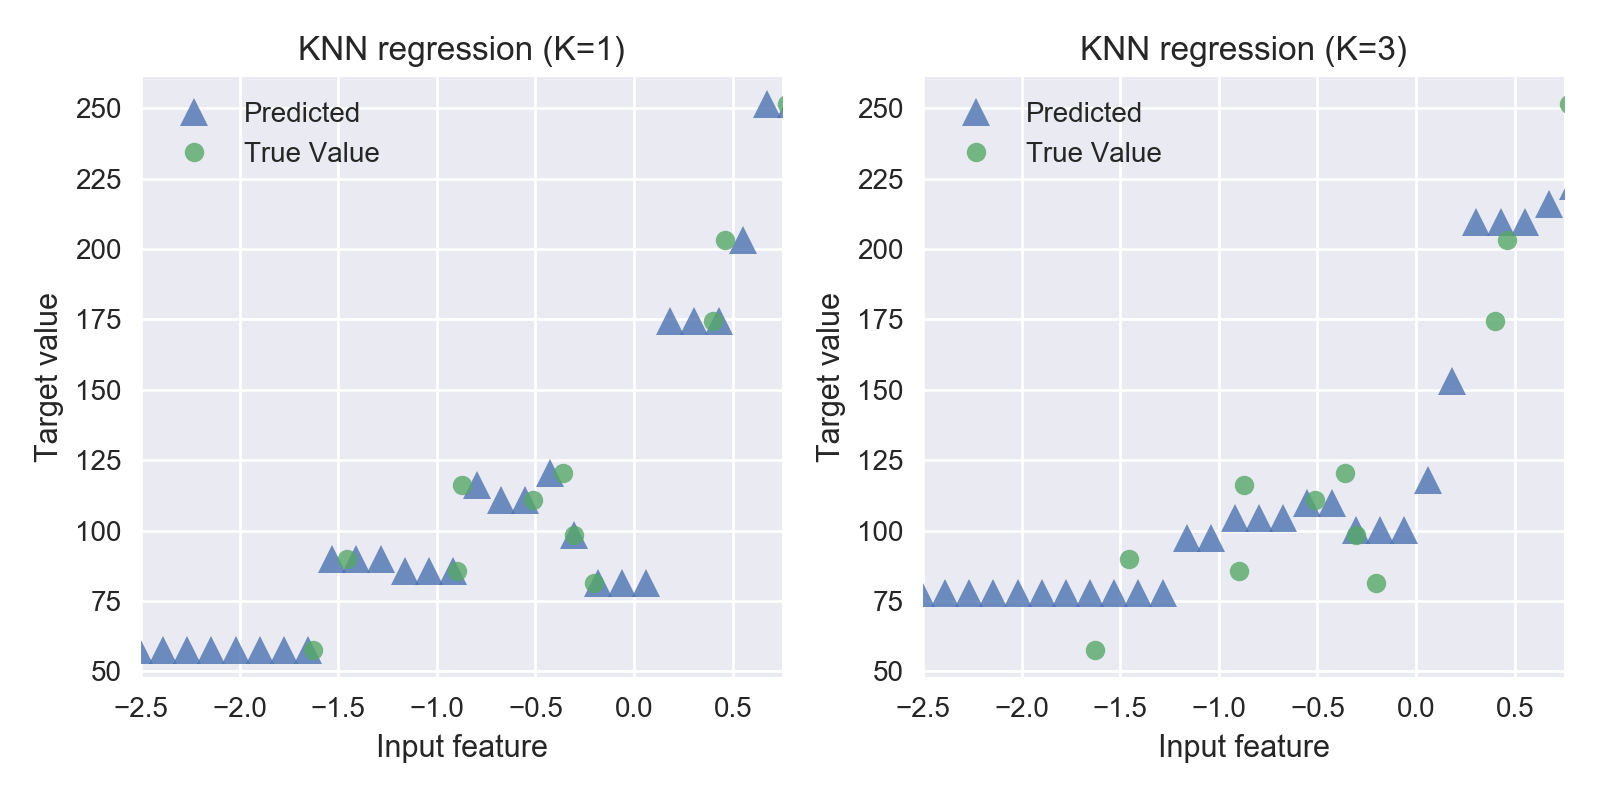

In [49]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

Because the target values in a regression problem are continuous as compared to the discrete values that we see for classifier target labels. To assess how well a regression model fits the data, we use a regression score called r-squared that's between 0 and 1. We'll cover some additional types of regression evaluation scores later in the course. For the r-squared value, a value of 1 corresponds to the best possible performance. A model that makes perfect predictions. 
<img src="KNN_regclass_5.png" alt="jupyter" style="width: 600px;"/> 


### Regression model complexity as a function of K

Just as we did for classification, let's look at the connection between model complexity and generalization ability as measured by the r-squared training and test values on the simple regression dataset. The series of plots on the notebook shows how the KNN regression algorithm fits the data for k = 1, 3, 7, 15, and in an extreme case of k = 55. It represents almost half the training points. We can see the same pattern in model complexity for k and N regression that we saw for k and N classification. Namely, that small values of k give models with higher complexity. And large values of k result in simpler models with lower complexity. 

Starting on the left when k = 1, the regression model fits the training data perfectly with a r-squared score of 1.0. But it's very bad at predicting the target values for new data samples, as reflected in the r-squared test score of only 0.155. As the value of k increases, which we can see acts to smooth out these local variations to capture more of the global trend. 

Again the training set score drops, but the model gets better at generalizing to new data and the test score goes up as K increases. Finally in this series, the model with k = 15 has the best test set performance, with an r-squared score of 0.485. Increasing k much further however to k = 55, results in both the training and test set scores dropping back down to lower levels, as the model now starts to under-fit. In other words, it's too simple to do well, even on the training data. 

The pro's of the nearest neighbor approach are that it's simple and easy to understand why a particular prediction is made. A k-nearest neighbor approach can be a reasonable baseline against what you can compare more sophisticated methods. 

When the training data has many instances, or each instance has lots of features, this can really slow down the performance of a k-nearest neighbors model. So in general, if your data set has hundreds or thousands of features, you should consider alternatives to k-nearest neighbors models, especially if your data is sparse. Meaning that each instance has lots of features, but most of them are zero. 

<IPython.core.display.Javascript object>


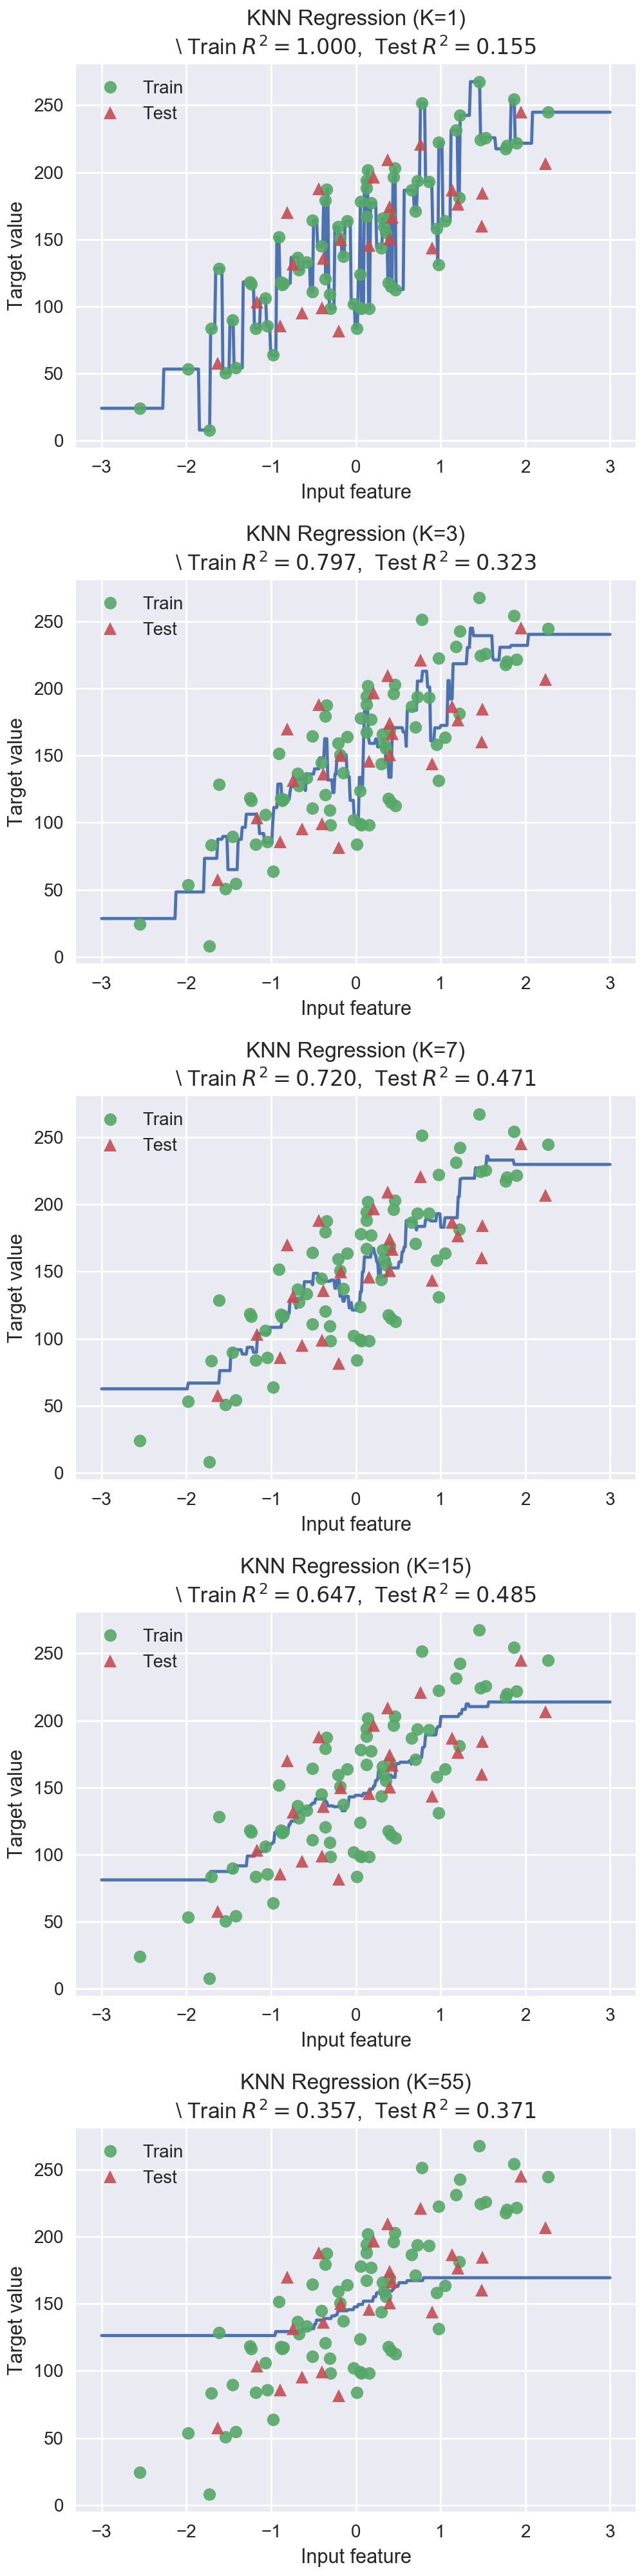

subaxes:  [<matplotlib.axes._subplots.AxesSubplot object at 0x107b61dd8>


In [52]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
# X_R1, y_R1 from regresion of one input variable (above)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

print('subaxes: ', subaxes)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\ Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


So to sum up, and as a review of what we saw in week one. The two key parameters for both regression and classification in nearest neighbors models are naturally n-neighbors which controls the value of the number of neighbors to consider and thus the model complexity, as we saw. 

<img src="KNN_regclass_6.png" alt="jupyter" style="width: 600px;"/> 

And the metric parameter which controls the distance function between points and thus which points are considered as nearest in finding neighbors. 

We didn't explore the metric parameter here and that's beyond the scope of this course. But in most cases, the default Euclidean setting words pretty well with most datasets. 

<a id="LR"></a> 
## Linear models for regression
<img src="module2_linear_1.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_linear_2.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_linear_3.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_linear_4.png" alt="jupyter" style="width: 600px;"/>
<img src="module2_linear_6_0.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_linear_5.png" alt="jupyter" style="width: 600px;"/>
<img src="module2_linear_6_1.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_linear_6_2.png" alt="jupyter" style="width: 600px;"/>
<img src="module2_linear_7.png" alt="jupyter" style="width: 600px;"/> 

Here we can see how these two regression methods represent two complimentary types of supervised learning. The K **nearest neighbor regressor doesn't make a lot of assumptions about the structure of the data. And gives potentially accurate, but sometimes unstable predictions, that are sensitive to small changes in the training data. So as a correspondingly higher training set R-squared score compared to least-squares linear regression**. K-NN achieves an R-squared score of 0.72, and least-squares achieves an R-squared of 0.679 on the training set. 

On the other hand, **linear models make strong assumptions about the structure of the data. In other words, that the target value can be predicted using a weighted sum of the input variables. And linear models give stable but potentially inaccurate predictions**. However, in this case, it turns out that the linear model's strong assumption, that there's a linear relationship between the input and output variables, happens to be a good fit for this dataset. 

And so it's better at more accurately predicting the y value for new x values that weren't seen during training. And we can see that the **linear model gets a slightly better test set score of 0.492, versus 0.471 for K nearest neighbors. And this indicates its ability to better generalize and capture this global linear trend.** 
<img src="module2_linear_8.png" alt="jupyter" style="width: 600px;"/> 


### Linear regression

In [53]:
from sklearn.linear_model import LinearRegression

# X_R1, y_R1 from regresion of one input variable (above)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


/Users/starignus/.virtualenvs/v35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<a id="LR-LS"></a> 
### Linear regression: example plot 

<IPython.core.display.Javascript object>


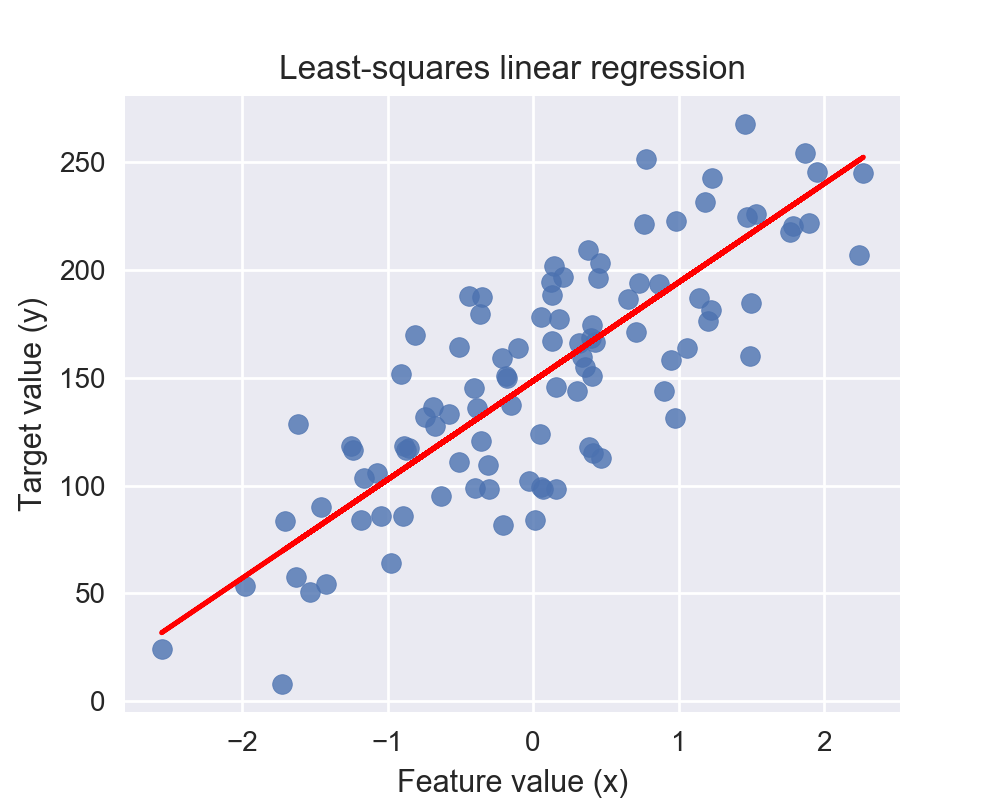

In [54]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('number of coef:{}'.format(len(linreg.coef_)))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306724887131
linear model coeff:
[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89

<a id="LR-Ridge"></a> 
### Ridge regression

The penalty term called regularisation is a way of prevent overfitting and improves the generalisation prformance. The effect of regularisation is to reduce the complexity of the final estimtor model (small $\alpha$ leeds to high variance or overfit, whereas large $\alpha$ leads to high bias or underfit; the defualt value of $\alpha$ is 1.0 and 0 means the ordinary mean squares).
<img src="module2_riglasspoly_1.png" alt="jupyter" style="width: 600px;"/> 


In [61]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035845663
ridge regression linear model coeff:
[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03

#### Ridge regression with feature normalization

To improve the reustls deamatically we need to do feature preprocesing and normalisation. Ridge regretion is regularsing the linear regresion by imposing that sum squares penalty on the size of the W coefficients. So the effect of increasing alpha is to shrink the W cofficeints towards zero and towards each other. But if the input variables (the features) have very different scales, when the shrinking happens of the coefficients, input variables with different scales will have different contributions to the L2 penalty. Becuase the L2 penalty is the sum squares of all the coefficnets. So transforming the input features that all are on the same scale, the Ridge penalty is in some sense applied more fairly to all features without undonly waitng some more one than ohters, just for the difference of scales. So more generaly we will see:
<img src="module2_riglasspoly_2.png" alt="jupyter" style="width: 600px;"/> 

Example of how it works for two features, all has bee transform in a range of 0 to 1:
<img src="module2_riglasspoly_3.png" alt="jupyter" style="width: 600px;"/> 
To use it in Sklern:
<img src="module2_riglasspoly_4.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_riglasspoly_5.png" alt="jupyter" style="width: 600px;"/> 
A down side of perfomring feature normalisation is that the resulting model and the transformed features may be harder to interpreat. At the end, the type of feature normalisation that is best apply could depend on the data set, learning task and learning algorithm to be used.

In [62]:
#  Check here how it is applied the points above
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044156
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha
**In general, regularisation works specially well when you have realative small amount of training data compared with the number of features on your model. Regularisation becomes less important as the ammount of taining data you have increases**. We can see the effect of varying the amount of regularisation on the scale and test data using different settings of alpha). The best r-squared in the test set is with alpha around 20. the others leads to a worst model fit. This is another ilustation of the general relationship of model complexity and test set perfomance that we saw early. Where there is often an intermidian best value of a model complexiy paramenter that does not lead to over and underfitting.

In [63]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \ r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, \ r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, \ r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, \ r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, \ r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, \ r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, \ r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, \ r-squared training: 0.31, r-squared test: 0.30



/Users/starignus/.virtualenvs/v35/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.393300821894172e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


<a id="LR-Lasso"></a> 
### Lasso regression
Another kind of regularise regression is called LASSO regresion. It has a penalisation too. This is called L1 penalty which looks similar since it computes the sum over the absoulte values of the coeffcinets. **In Lasso, a subset of the coeffcinets are force to be precisly zero which is a kind of automatic feature selection. The sparese solution is a subset of the most important features**. It makes the model more easy to interpreat in cases where there are a few input variables. By default, the paremeter $\alpha$ is zero. **LASSO is more helpful if there are few variables that have a medium or large effect on the output variable, otherwise if you have a lot of variables that contribute with medium or small effects, Ridge regresion is the better choice**.
<img src="module2_riglasspoly_6.png" alt="jupyter" style="width: 600px;"/> 


In [66]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sometimes with some data you get a convergence warning, in that case you can set
# max_iter to a larger value that typically os 20,000 or more, which will increase 
# the computation time accordingly
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
print('Number of coeff:\n{}'.format(len(linlasso.coef_)))
print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))
print('All Features', list(X_crime))
print('Features with non-zero weight (sorted by absolute magnitude):')

# Descending magnitude
for e in sorted(list(zip(list(X_crime), linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985795
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Number of coeff:
88
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0

In [81]:
# Testing sorting and zip
# Features sorted by abs. magnitude
# https://docs.python.org/3/library/functions.html#sorted
sorted(zip(list(X_crime), linlasso.coef_), key= lambda e: -abs(e[1]), reverse=False)

[('PctKidsBornNeverMar', 1488.3651222865133),
 ('PctKids2Par', -1188.7396867043224),
 ('HousVacant', 459.53799903358487),
 ('PctPersDenseHous', 339.04468804185217),
 ('NumInShelters', 264.93206554567331),
 ('MalePctDivorce', 259.328892259962),
 ('PctWorkMom', -231.42347299198704),
 ('pctWInvInc', -169.67564456492477),
 ('agePct12t29', -168.18346054422753),
 ('PctVacantBoarded', 122.69221825705162),
 ('pctUrban', 119.693819402263),
 ('MedOwnCostPctIncNoMtg', -104.57143405478094),
 ('MedYrHousBuilt', 91.412022424339398),
 ('RentQrange', 86.356000416371117),
 ('OwnOccHiQuart', 73.143658559721828),
 ('PctEmplManu', -57.529919657794728),
 ('PctBornSameState', -49.393551878307008),
 ('PctForeignBorn', 23.448864495369257),
 ('PctLargHouseFam', 20.144194150328214),
 ('PctSameCity85', 5.1977536921899166),
 ('population', 0.0),
 ('householdsize', 0.0),
 ('agePct12t21', -0.0),
 ('agePct16t24', -0.0),
 ('agePct65up', -0.0),
 ('numbUrban', 0.0),
 ('medIncome', 0.0),
 ('pctWWage', -0.0),
 ('pctWFarm

We need to be careful in interpreting any results for data in a complex problem like crime. LASSO regression help us to see some of the stronger relationships between the input and ouput variables of this data set. Looking at the top features we can see that location factors like 'PctPersDenseHouse' (hurban area) and socioeconomic variables like the fraction of vacant houses in the area'HouseVacant', are possible correlated with crime. Other variables, like 'PctKids2Par' is negative correlated.
<img src="module2_riglasspoly_7.png" alt="jupyter" style="width: 600px;"/> 


#### Lasso regression with regularization parameter: alpha
We can see the effect of tunning the regularisation parameter for LASSO regresion.

In [82]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \ r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



#### Side note on regularisation
[Why Two Different Kinds of Regularization?](https://msdn.microsoft.com/en-us/magazine/dn904675.aspx)

L1 and L2 regularization are similar. Which is better? The bottom line is that even though there are some theory guidelines about which form of regularization is better in certain problem scenarios, in my opinion, in practice you must experiment to find which type of regularization is better, or whether using regularization at all is better.

As it turns out, using L1 regularization can sometimes have a beneficial side effect of driving one or more weight values to 0.0, which effectively means the associated feature isn’t needed. This is one form of what’s called feature selection. For example, in the demo run in Figure 1, with L1 regularization the last model weight is 0.0. This means the last predictor value doesn’t contribute to the LR model. L2 regularization limits model weight values, but usually doesn’t prune any weights entirely by setting them to 0.0.

So, it would seem that L1 regularization is better than L2 regularization. However, a downside of using L1 regularization is that the technique can’t be easily used with some ML training algorithms, in particular those algorithms that use calculus to compute what’s called a gradient. L2 regularization can be used with any type of training algorithm.

To summarize, L1 regularization sometimes has a nice side effect of pruning out unneeded features by setting their associated weights to 0.0 but L1 regularization doesn’t easily work with all forms of training. L2 regularization works with all forms of training, but doesn’t give you implicit feature selection. In practice, you must use trial and error to determine which form of regularization (or neither) is better for a particular problem.

More in [Link](https://stats.stackexchange.com/questions/200416/is-regression-with-l1-regularization-the-same-as-lasso-and-with-l2-regularizati)

<a id="LR-Poli"></a> 
### Polynomial regression
We can write a new regression problem by adding more features (5 in this case) from the orginals that we had to predict the same ouput variable (We are doing polinomial feature transformation). It still a linear regression problem that can be solved with the techniques we have leaned so far. The polinomila feature transformation, that we can use to transform a problem into a higher dimension regresion space.  
<img src="module2_riglasspoly_8.png" alt="jupyter" style="width: 600px;"/> 
Adding these polinomial features allow us a much reach set of functions that we can fit to the training data. This is also effective with classification and we will see it again in kernelised SVM.
<img src="module2_riglasspoly_9.png" alt="jupyter" style="width: 600px;"/> 
When we add these polinomial features, we essentially adding into the model ability to capture the interactions between thses fetures in the linear model. For example, housing prices varies as the quadratic function of both, the Logue size is on and the ammount of taxes paid on property as a theretical example.
<img src="module2_riglasspoly_10.png" alt="jupyter" style="width: 600px;"/> 

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}' .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42   6.     0.53  10.24   6.55  -2.02  -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  0.    16.65  26.73 -22.13  12.44   6.93   1.05   3.71 -13.38  -5.73
   1.62   3.66   5.05  -1.46   1.95 -15.13   4.87  -2.97  -7.78   5.15
  -4.65  18.41  -2.22   2.17  -1.28   1.88   0.15   0.56  -0.89  -2.18
   1.38  -4.9   -2.24   1.38  -0.55  -1.09]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(poly deg 2 + ridge) linear model coeff (w):
[ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6 

## Linear models for classification

<a id="LR-LR"></a> 
### Logistic regression
Logistic regression can be seen as a kind of generalized linear model. And like ordinary least squares and other regression methods, logistic regression takes a set input variables, the features, and estimates a target value. 

However, unlike ordinary linear regression, in it's most basic form logistic repressions target value is a binary variable instead of a continuous value. There are flavors of logistic regression that can also be used in cases where the target value to be predicted is a multi class categorical variable, not just binary. But for now we'll focus on the simple binary case of logistic regression. 

Linear regression predicts a real valued output y based on a weighted sum of input variables or features xi, plus a constant b term. This diagram shows that formula in graphical form. The square boxes on the left represent the input features, xi. And the values above the arrows represent the weights that each xi is multiplied by. The output variable y in the box on the right is the sum of all the weighted inputs that are connected into it. 

Note that we're adding b as a constant term by treating it as the product of a special constant feature with value 1 multiplied by a weight of value b. This formula is summarized in equation form below the diagram. 

The job of linear regression is to estimate values for the model coefficients, wi hat and b hat. They give a model that best fit the training data with minimal squared error. 
<img src="module2_logregre_1.png" alt="jupyter" style="width: 600px;"/> 

Logistic regression is similar to linear regression, but with one critical addition. 
Here, we show the same type of diagram that we showed for linear regression with the input variables, xi in the left boxes and the model coefficients wi and b above the arrows. The logistic regression model still computes a weighted sum of the input features xi and the intercept term b, but it runs this result through a special non-linear function f, the logistic function represented by this new box in the middle of the diagram to produce the output y. 

The logistic function itself is shown in more detail on the plot on the right. It's an S shaped function that gets closer and closer to 1 as the input value increases above 0 and closer and closer to 0 as the input value decreases far below 0. The effect of applying the logistic function is to compress the output of the linear function so that it's limited to a range between 0 and 1. Below the diagram, you can see the formula for the predicted output y hat which first computes the same linear combination of the inputs xi, model coefficient weights wi hat and intercept b hat, but runs it through the additional step of applying the logistic function to produce y hat. 

If we pick different values for b hat and the w hat coefficients, we'll get different variants of this s shaped logistic function, which again is always between 0 and 1. Because the job of basic logistic regression is to predict a binary output value, you can see how this might used for binary classification. 

We could identify data instances with the target value of 0 as belonging to the negative class and data instances with a target value of 1 belonging to the positive class. Then the value of y hat, that's the output from the logistic regression formula, can be interpreted as the probability that the input data instance belongs to the positive class, given its input features. 
<img src="module2_logregre_2.png" alt="jupyter" style="width: 600px;"/> 
Suppose we want to whether or not a student will pass a final exam based on a single input variable that's the number of hours they spend studying for the exam. Students who end up failing the exam are assigned to the negative class, which corresponds to a target value of 0. And students who pass the exam are assigned to the positive class and associated with a target value of 1. 

This plot shows an example training set. The x-axis corresponds to the number of hours studied and the y-axis corresponds to the probability of passing the exam. The red points to the left, with a target value of 0 represent points in the training set, which are examples of students who failed the exam, along with the number of hours they spent studying. 

Likewise, the blue points with target value 1 on the right represent points in the training set, corresponding to students who passed the exam. With their x values representing the number of hours those students spent studying. 
Using logistic regression, we can estimate model coefficients for w hat and b hat that produce a logistic curve that best fits these training points. 

In this example that logistic curve might look something like this. Once the model coefficient has been estimated, we now have a formula that can use the result logistic function to estimate the probability that any given student will pass the exam, given the number of hours they've studied. Students who estimated probability of passing the exam is greater than or equal to 50% are predicted to be in the positive class. Otherwise, they're predicted to be in the negative class.  So in this example we can see that students who study for more than three hours will be predicted to be in the positive class. 
<img src="module2_logregre_3.png" alt="jupyter" style="width: 600px;"/> 
Let's look at an example that uses two input features now, instead of one. Here the plots show a training set with two classes. Each data point has two features. Feature 1 corresponds to the x-axis, and Feature 2 corresponds to the y-axis. The data points in the red class on the left, form a cluster with low Feature 1 value, and high Feature 2 value. And the points in the blue class have intermediate Feature 1 value, and low Feature 2 value. 

We can apply logistic regression to learn a binary classifier using this training set, using the same idea we saw in the previous exam example. 

<img src="module2_logregre_4.png" alt="jupyter" style="width: 600px;"/> 
To do this, we'll add a third dimension shown here as the vertical y-axis. Corresponding to the probability of belonging to the positive class. 

We'll say that the red points are associated with the negative class and have a target value of 0, and the blue points are associated with the positive class and have a target value of 1. Then just as we did in the exam studying example, we can estimate the w hat and b hat parameters of the logistic function that best fits this training data. The only difference is that the logistic function is now a function of two input features and not just one. So it forms something like a three dimensional S shaped sheet in this space. 

Once this logistic function has been estimated from the training data, we can use it to predict the class membership for any point, given its Feature 1 and Feature 2 values, same way we did for the exam example. Any data instances whose logistic probability estimate y hat is greater than or equal to 0.5 are predicted to be in the positive blue class, otherwise, in the other red class. 

Now if we imagine that there's a plane representing y equals 0.5, as shown here, that intersects this logistic function. It turns out that all the points that have a value of y = 0.5, when you intersect that with a logistic function, the points all lie along a straight line. 
<img src="module2_logregre_5.png" alt="jupyter" style="width: 600px;"/> 
In other words, using logistic regression gives a linear decision boundary between the classes as shown here. If you imagine looking straight down on the 3D logistic function on the left, you get the view that looks something like something on the right. Here. 

The points with y greater or equal to 0.5 on the logistic function, lie in a region to the right of the straight line, which is the dash line on the right here. And the points with y less than 0.5 on the logistic function would form a region to the left of that dash line. 
<img src="module2_logregre_6.png" alt="jupyter" style="width: 600px;"/> 

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)
Let's look at an example with real data in Scikit-Learn. To perform logistic, regression in Scikit-Learn, you import the logistic regression class from the sklearn.linear model module, then create the object and call the fit method using the training data just as you did for other class files like k nearest neighbors. 

Here, the code also sets a parameter c to 100, which we'll explain in a minute. The data set we're using here is a modified form of our fruits data set, using only height and width as the features, the features space, and with the target class value modified into a binary classification problem predicting whether an object is an apple, a positive class, or something other than an apple, a negative class. 

<IPython.core.display.Javascript object>


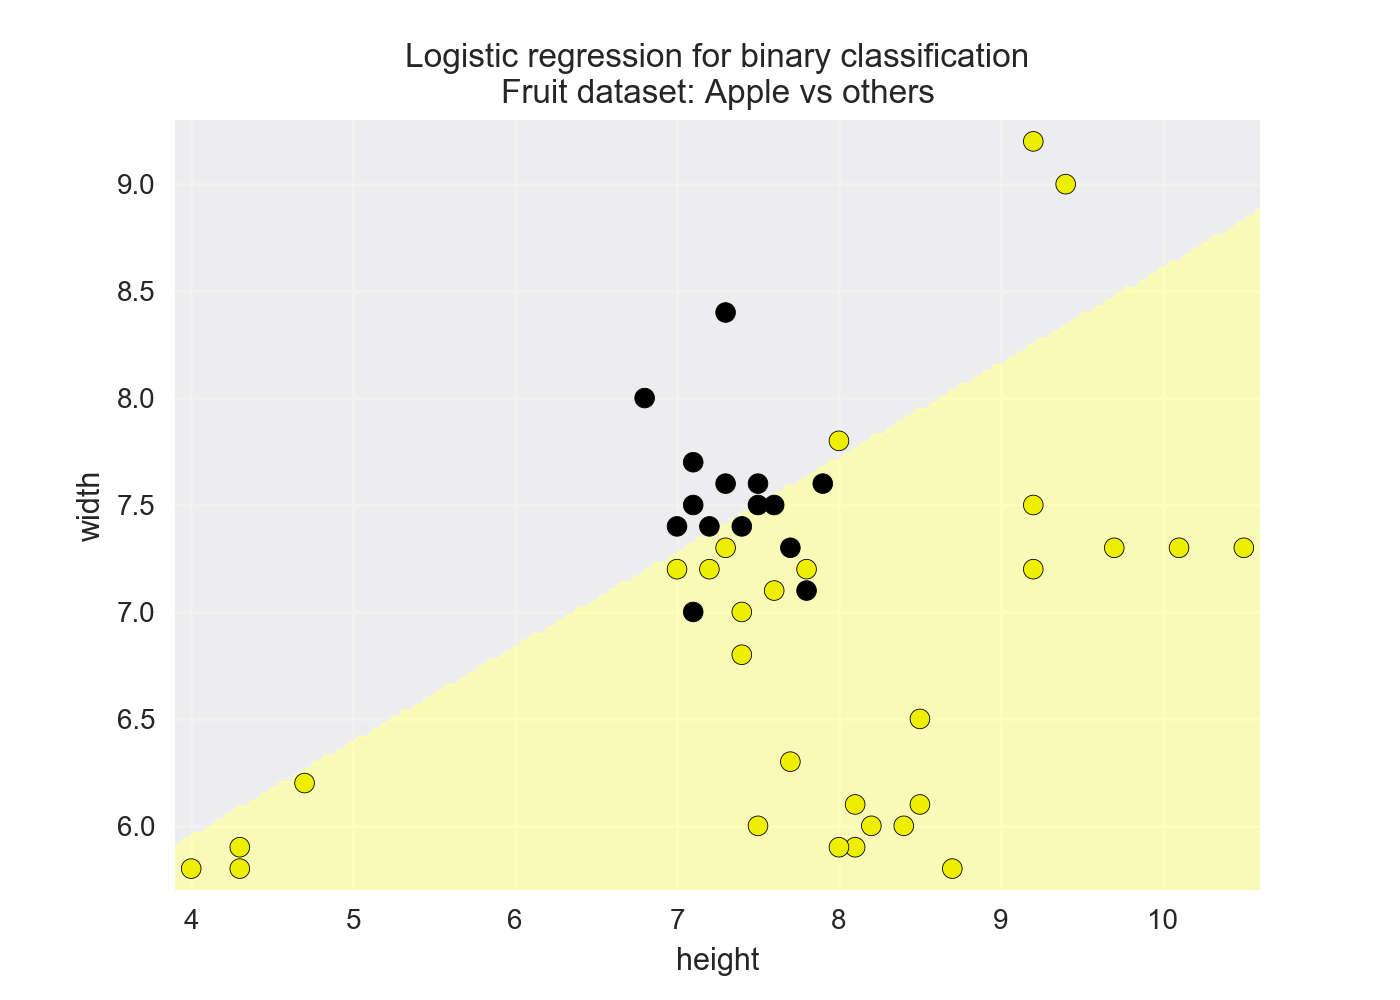

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [86]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h, w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

<img src="module2_logregre_7.png" alt="jupyter" style="width: 600px;"/> 

#### Logistic regression on simple synthetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

# X_C2, y_C2 from above binary classification two features
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter
Like ridge and lasso regression, a regularization penalty on the model coefficients can also be applied with logistic regression, and is controlled with the parameter C (**In the case of rigid and lasso it is by $\alpha$. Higher values of $\alpha$ correspond to more regularization**). In fact, the same L2 regularization penalty used for ridge regression is turned on by default for logistic regression with a default value C = 1. Note that for both Support Vector machines and Logistic Regression, **higher values of C correspond to less regularization**. With large values of C, logistic regression tries to fit the training data as well as possible. While with small values of C, the model tries harder to find model coefficients that are closer to 0, even if that model fits the training data a little bit worse. You can see the effect of changing the regularization parameter C for logistic regression in this visual. 

<img src="module2_logregre_8.png" alt="jupyter" style="width: 600px;"/> 

Using the same upper class of fire we now vary C to take on values from 0.1 on the left to 1.0 in the middle, and 100.0 on the right. Although the real power of regularization doesn't become evident until we have data that has higher dimensional feature spaces. You can get an idea of the trade off that's happening between relying on a simpler model, one that puts more emphasis on a single feature in this case, out of the two features, but has lower training set accuracy. And that's an example as shown on the left with C = 0.1. Or, better training data fit on the right with C = 100. You can find the code that created this example in the accompanying notebook. 

<IPython.core.display.Javascript object>


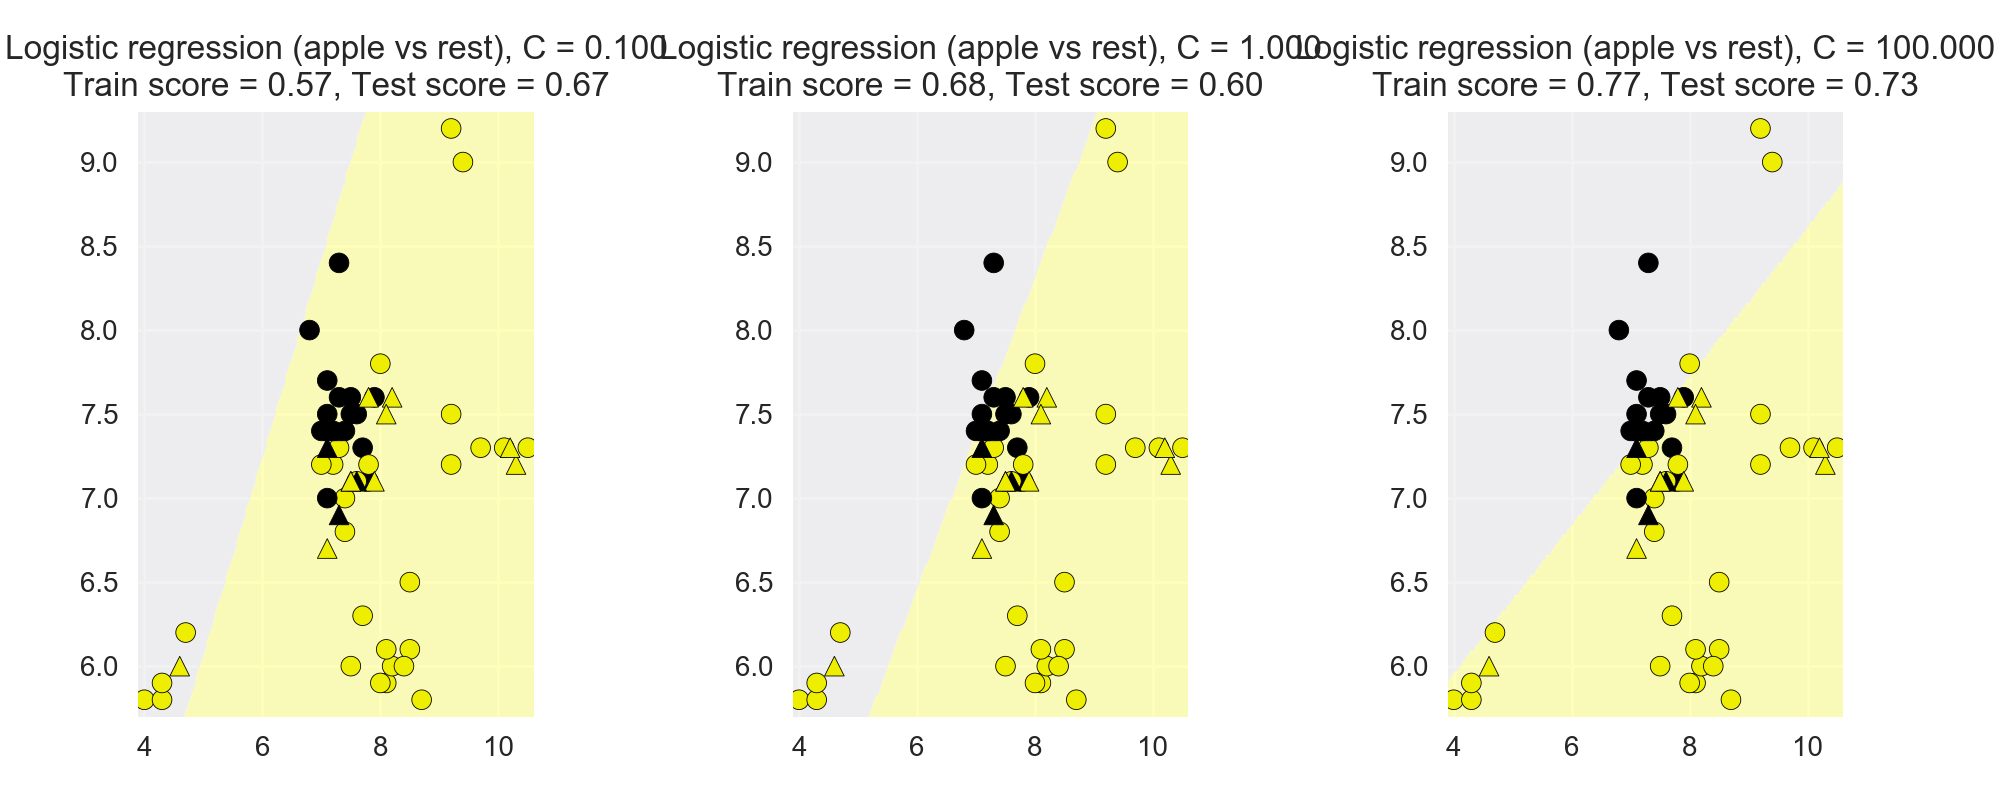

In [89]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(1, 3, figsize=(10, 4))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset
Finally, we show how logistic regression again, with L2 regularization turned on by default, can be applied to a real data set with many more features. The breast cancer data set. Here, logistic regression achieves both training, and test set accuracy of 96% 

In [90]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


<a id="SVM"></a> 
### Support Vector Machines

#### Linear Support Vector Machine
Let's look at how linear models are also used for classification, starting with binary classification. 
This approach to prediction uses the same linear functional form as we saw for regression. But instead of predicting a continuous target value, we take the output of the linear function and apply the sine function to produce a binary output with two possible values, corresponding to the two possible class labels. If the target value is greater than zero, the function returns plus one and if it's less than zero, the function returns minus one. Here's a specific example:

So let's take a look at a simple linear classification problem, a binary problem that has two different classes, and where each data instance is represented by two informative features. So we're going to call these features x1 on the x-axis and x2 on the y-axis. Now, how do we get from taking a data instance that's described by a particular combination of x1, x2 to a class prediction. 

Well in a linear classifier, what we do is we take the feature values assigned to a particular data point. So in this case, it might be (2.1,0). So that represents the x1 and x2 feature values for this particular instance, let's say, and so that corresponds to the input here. And then we take those two x1, x2 values and put them through a linear function f here. And the output of this f needs to be a class value. So either we want it to return +1, if it's in one class and -1 if it's in the other class. So the linear classifier does that by computing a linear function of x1, x2 that's represented by this part of the equation here. 

So this *w* is a vector of weights. This x represents the vector of feature values. And then b is a bias term that gets added in. So this is a dot product, this circle here is a dot product. Which means that, let's say, the simple case where we had (w1, w2), and a future vector of (x1, x2). The dot product of those is simply the linear combination of w1 x1 + w2 x2. 

We take the X values, and we have certain weights that are learned for the classifier. So we compute w1 x1 + w2 x2. Then we feed that, and then plus a bias term, if there is one.  And we feed the output of that through the sign function that converts the value in here. If it's above 0, it'll convert to +1, and if it's below 0, it'll convert it to -1 and that's what the equation represents here. So that is the very simple rule that we use to convert a data instance with its input features to an output prediction
<img src="module2_LCSVM_1.png" alt="jupyter" style="width: 600px;"/>

Okay, let's take a look using a specific linear function to see how this works in practice. So what I've done here is drawn a straight line through the space that is defined by the equation x1- x2 = 0. In other words, every point on this line satisfies this equation. So you can see, for example, that x1 = -1 and x2 = -1 and if you subtract them you get 0. Essentially, it's just the line that represents all the points where x1 and x2 are equal. 

So this corresponds to, so we can rewrite this x1- x2 = 0 into a form that uses a dot product of weights with the input vector x $f(\vec x, \vec w, b) = sign(\vec w \cdot \vec x + b$) with $w = [-1, 1]$ and $b=0$. So in order to get x1- x2 = 0 that's equivalent writing a linear function where you have a weight vector of 1 and -1 and a bias term of 0. So for example, so if we have weights (w1, w2) dot (x1, x2). We call that this is just the same as computing w1 x1 + w2 x2. And so in this case, if w is 1 and -1, that's equivalent to x1- x2.

So all I've done here then is just convert the description of this line into a form that can be used as a decision rule for classifier. So I might have to look at a specific point. So suppose that we wanted to classify the point here that had coordinates -0.75 and -2.25. So this point right here. So all we would do to have a classifier make a decision with this decision boundary would be to plug in those coordinates into this part of the function, apply the weights and the bias term that describe the decision boundary. 

So here we're computing. So this expression here corresponds to this part of the equation. And so, if we compute w1 times x1 + w2 times x2 plus 0, we get a value of 0.15 that's inside the sign function. And then the sign function will output 1 if this value is greater than zero, which it is or minus 1, if the value is less than zero. So in this case, because it's greater than zero, the output from the decision function would be plus 1. So this has classified this point as being class one (see the white rectagle in the image bellow). 

<img src="module2_LCSVM_2.png" alt="jupyter" style="width: 600px;"/> 

If we look at a different point, let's take a look at the point -1.75 and -0.25. So again, we're just going to up, so this is corresponding to the value of x1 and x2. And again, if we just take these values and plug them into this part of the equation. Apply the weights and the bias term that describe the decision boundary as you did before. We do this computation, we find out that, in fact, classifier predicts a class of -1 here. So you see that by applying a simple linear formula, we've been able to produce a class value for any point in this two dimensional features space. 

<img src="module2_LCSVM_3.png" alt="jupyter" style="width: 600px;"/>

So one way to define a good classifier is to reward classifiers for the amount of separation that can provide between the two classes. And to do this, we need define the concept of **classifier margin**. So informally, for our given classifier, The margin is the width that the decision boundary can be increased before hitting a data point. So what we do is we take the decision boundary, and we grow a region around it. Sort of in this perpendicular to the line in this direction and that direction, and we grow this width until we hit a data point. So in this case, we were only able to grow the margin a small amount here, before hitting this data point. So this width here between the decision boundary and nearest data point represents the margin of this particular classifier. 

<img src="module2_LCSVM_4.png" alt="jupyter" style="width: 600px;"/> 

Now you can imagine that for every classifier that we tried, we can do the same calculation or simulation to find the margin. And so **among all possible classifiers that separate these two classes then, we can define the best classifier as the classifier that has the maximum amount of margin** which corresponds to the one shown here. So you recall that the original classifier on the previous slide had a very small margin. This one manages to achieve a must larger margin. So again, **the margin is the distance, the width, that we can go from the decision boundary perpendicular to the nearest data point.** 

**So you can see that by defining this concept of margin that sort of quantifies the degree to which the classifier can split the classes into two regions that have some amount of separation between them. We can actually do a search for the classifier that has the maximum margin. This maximum margin classifier is called the Linear Support Vector Machine, also known as an LSVM or a support vector machine with linear kernel**. Now we'll explain more about what the concept of a kernel is and how you can define nonlinear kernels as well as kernels, and why you'd want to do that. We'll cover those shortly in a continuation of our support vector machine lecture later in this particular week. Here's an example in the notebook on how to use the default linear support vector classifier in scikit-learn, which is defined in the sklearn SVM library. 

<img src="module2_LCSVM_5.png" alt="jupyter" style="width: 600px;"/> 

The linear SVC class implements a linear support vector classifier and is trained in the same way as other classifiers, namely by using the fit method on the training data. Now in the simple classification problem I just showed you, the two classes were perfectly separable with a linear classifier. In practice though, we typically have noise or just more complexity in the data set that makes a perfect linear separation impossible, but where most points can be separated without errors by linear classifier. And our simple binary classification dataset here is an illustration of that. So how tolerant the support vector machine is of misclassifying training points, as compared to its objective of minimizing the margin between classes is controlled by a regularization parameter called C which by default is set to 1.0 as we have here. 
 

<IPython.core.display.Javascript object>


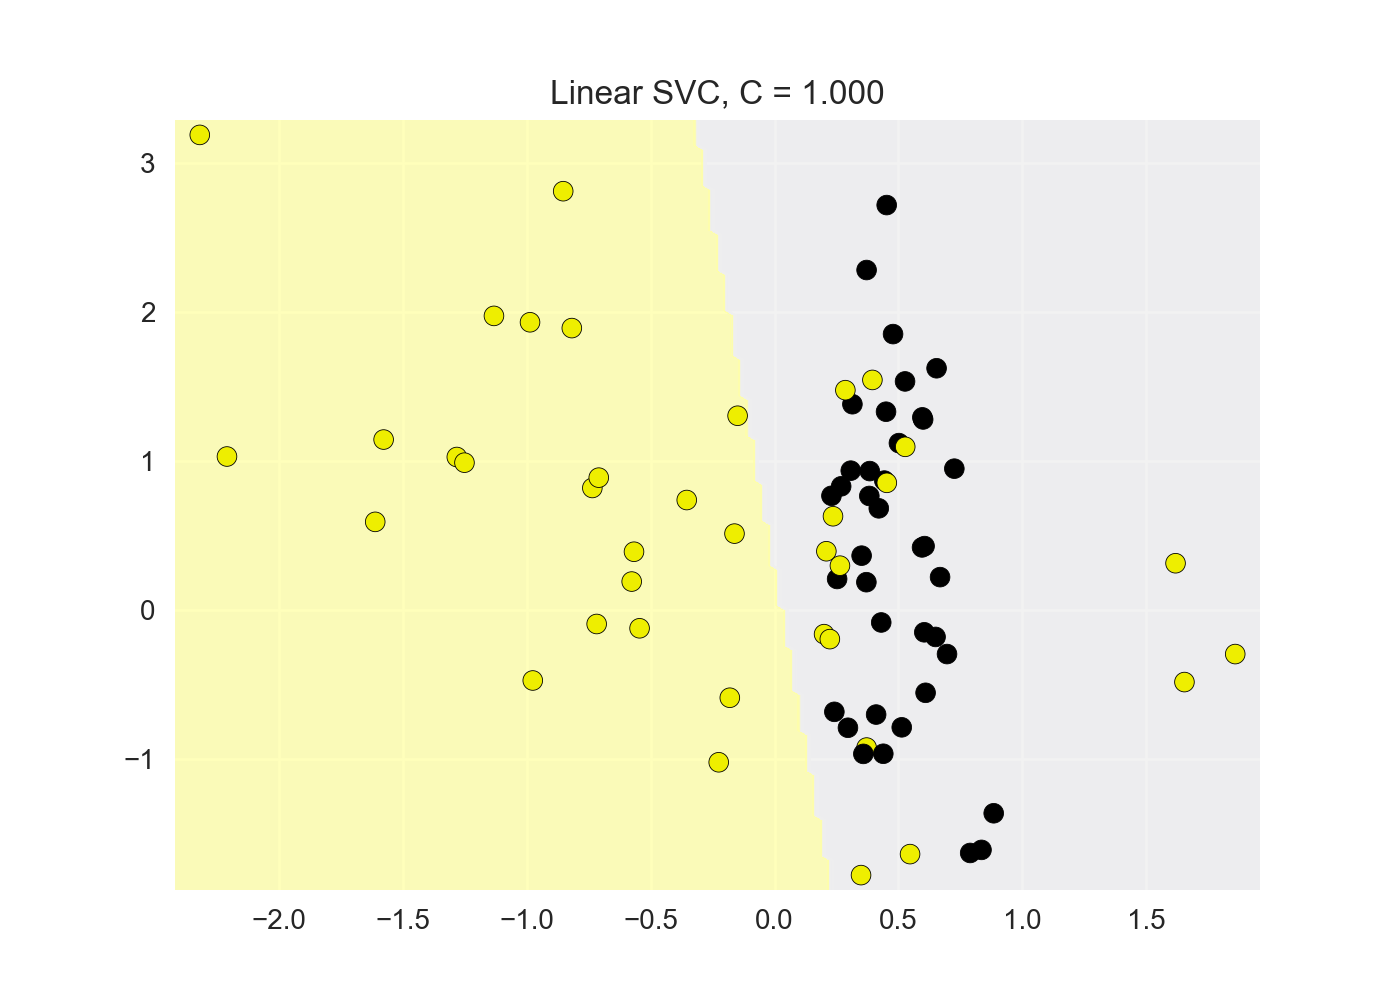

In [91]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# X_C2, y_C2 from above binary classification two features
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

An important note, in the case of SVM and Logistic Regression, $C = 1/\alpha$ where **higher values of C correspond to less regularisation, more complex model** (larger $C$ leeds to high variance or overfit, whereas small $C$ leads to high bias or underfit). Therefore, in the linear case regularisation is controled by $\alpha$ instrad of $C$ where higher values of $\alpha$ means more regularisation and simpler model (small $\alpha$ leeds to high variance or overfit, whereas large $\alpha$ leads to high bias or underfit). 

* Large $\alpha$, more regularisation, simpler model, high bias
* Large $C$, less regularisation, complex model, high variance

Check the matemathical expression from Adnrew NJ ML course:
<img src="module2_LCSVM_6_0.png" alt="jupyter" style="width: 600px;"/> 

Larger values of C represent less regularisation (causing higher variance) and will cause the model to fit the training set with these few errors as possible, even if it means using a small immersion decision boundary. Very small values of C on the other hand use more regularization that encourages the classifier to find a large marge on decision boundary, even if that decision boundary leads to more points being misclassified. 
<img src="module2_LCSVM_6.png" alt="jupyter" style="width: 600px;"/> 


#### Linear Support Vector Machine: C parameter
Here's an example in the notebook showing the effect of varying C on this basic classification problem. On the right, when C is large, the decision boundary is adjusted so that more of the black training points are correctly classified. While on the left, for small values of C, the classifier is more tolerant of these errors in favor of capturing the majority of data points correctly with a larger margin.

<IPython.core.display.Javascript object>


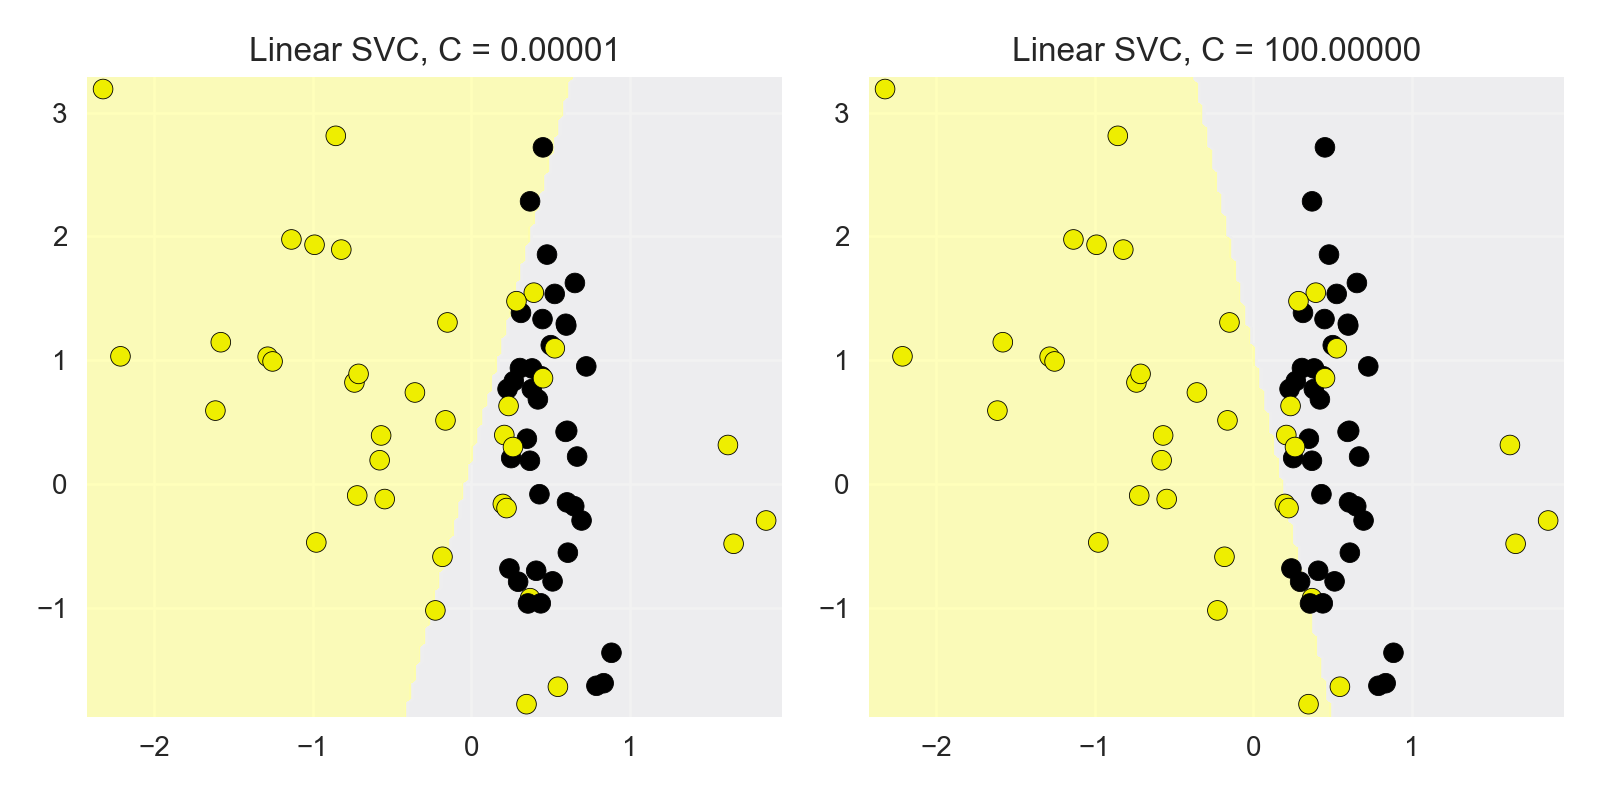

In [92]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset
Finally, here's an example of applying the Linear Support Vector Machine to a real world data set, the breast cancer classification problem. And here, we can see that it achieves reasonable accuracy without much parameter tuning. 

In [93]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.90
Accuracy of Linear SVC classifier on test set: 0.90


On the positive side, linear models, in the case of linear and logistic regression, are simple and easy to train. And for all types of linear models, prediction's very fast because, of the linear nature of the prediction function. 

Linear models including Linear Support Vector Machines also perform effectively on high dementional data set, especially, in cases where the data instances are sparse. Linear Models scale well to very large datasets as well. 

In the case of Linear Support Vector Machines, they only use a subset of training points and decision function. These training points are called support vectors. So the algorithm can be implemented in a memory efficient way. 

<img src="module2_LCSVM_7.png" alt="jupyter" style="width: 600px;"/> 


<a id="SVMMC"></a> 
### Multi-class classification with linear models

Sklear makes really esay to lear multiclass classification models. It does this by converting a multiclass classification into a serie of binary series. When you pass the data set who has categorical variable for the target value, Sklern detects it automatically, and then for each class that has to be predicter, sklearn creats one binary classifier of that class agains the other classes. For example, in the fruit data set, there where 4 categories of fruit, so sklern learns four differnet binary classifiers. To predict the new data instance, it takes the labels to be predicted and run it agains each of the binary classifiers in tour, and the classifier with higher score is the one which classes are used to predict the value. Let's look an specific example with the fruit dataset.

If we look at the cofficents values obtanied by running a LSVM, we can see that instead of getting a single coefficents we are obtaning four values. These values corresponds to the four classes of fruits in the traning set. Also we have 4 intercept values. the fist one corresponds to apples agains the rest of the fruits, and the others onesare follows the same.  
<img src="module2_multiclass_1.png" alt="jupyter" style="width: 600px;"/> 
If we follow these linear formula, if it will predict an apple or not an apple. In the white squred in the following pictures there are two exmpales of the boundaries.
<img src="module2_multiclass_2.png" alt="jupyter" style="width: 600px;"/> 
<img src="module2_multiclass_3.png" alt="jupyter" style="width: 600px;"/> 

###### Extra notes from Applied Text Mining in Python course on SVM**

You have seen that this SVM tend to work only for binary classification problems, and we have seen an example of this, +1 and -1 so far, but then what happens when you have multiple classes? Let's take this example of the three classes, podiatry, nephrology, neurology. In general, when you were to use the SVM in a **multiclass classification** set up, you would want to learn it in one of two scenarios.

One is called **One-versus-rest**. Where you are actually learning binary classifiers between one class and all the other classes together. For example, this is the classifier between nephrology and all documents that are not nephrology. Assume that d1 to d9 are all nephrology documents. So this classification is a perfect classification to learn nephrology, as these nine documents, and anything that is not nephrology is on the other side. Then, we learn another classifier, this time for neurology. Where the documents d10 to d15 are neurology documents, and everything else, d1 to d9, and d16 to d21, are all not neurology. And then, we do the same thing with podiatry. You have the documents d16 to the d21, that is labeled podiatry, and everything else. That's d1 to d15, is going to be not podiatry. So in general, we are learning three classifiers, or **for n class setup, we are learning n classifiers**, such that all the points in one region, let's take the region as this, D16 to d21, ist' going to be not nephrology, yes on podiatry, And what's the other one. Yes, it's not on neurology. So it's not neurology, it's not nephrology, and it's podiatry. So this is going to be podiatry. Right?

<img src="module2_LCSVM_8.png" alt="jupyter" style="width: 600px;"/> 

Let's take another set up, and this set up is where instead of learning one-versus rest, we are going to do one- versus-one. That means that you're going to learn classifiers between let's say nephrology and neurology. So in this case you look at only documents that were labeled nephrology or neurology. That's d1 to d9, and d10 to d15, and separate them. So the red line just separates these two points. These two classes, I'm sorry. And then you learn another classifier. This is between neurology and podiatry, that works on a smaller set. Again it's between the d1 to d9 as the neurology documents, and d16 to d21 as the podiatry document. And again the third one, which is between nephrology and podiatry. When you have these three classes together, you can see that in general, **for an n-class set up, there are C(n,2) classifiers**. A combonotorial number n_square number of classifiers. It so happens that for three classes, it is three classifiers, But for four classes it'll likely to be six classifiers, and so on. But then, you can still use the same idea where you have these points, going to be called between the class labels podiatry and neurology, it's podiatry. Between the classes podiatry and nephrology. It's podiatry, and between the classes nephrology and neurology, it's basically nothing, because it's right in the middle, right? But you still see that sometimes it's going to be called nephrology, sometimes it's going to be called neurology, but the overall votes are still in favor of podiatry because you have two- that all of these points you're going to get two votes on podiatry because of the other two classes. And maybe one additional vote for nephrology or neurology. In any case, all of these points are still going to be classified correctly as podiatry. So both of these, in this particular toy dataset have been labeled the right way, but just the idea and the approach is very different. **In one case you're learning one class against all the other classes, and in the other case it's one versus one and do n_square a number of classes**.

<img src="module2_LCSVM_9.png" alt="jupyter" style="width: 600px;"/> 

There are parameters set typically with respect to what is the type of a **decision boundary you would want to learn**. We've talked about linear kernels a lot here. Linear decision boundaries, but you could have a polynomial kernel, or a regular basis function kernel and so on (see notes bellow). The other parameter for SVM is whether it's multiclass or not, and if it is multiclass, which one would you use, so **OVR would be the parameter setting for one-versus-rest**, and there are other parameter options possible. As you can see with one-versus-rest, you are learning fewer number of classifiers. So that's preferred over one-versus-one (remeber that n-class will have C(n,2) classifiers). The other important factor and a parameter would be **class weight**. So different classes could get different weights. For example, if you want a particular class, let's say spam or not spam, and you know that the spams are usually like 80% of e-mails somebody gets. So then he would want, that because it's just such a skewed distribution where one of the classes 80% and the other classes 20% you would want to give different weight to these two classes.

<img src="module2_LCSVM_10.png" alt="jupyter" style="width: 600px;"/> 

#### LinearSVC with M classes generates M one vs rest classifiers.
[SVM Sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
Note: The underlying C implementation uses a random number generator to select features when fitting the model. It is thus not uncommon to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

The underlying implementation, liblinear, uses a sparse internal representation for the data that will incur a memory copy.

Predict output may not match that of standalone liblinear in certain cases. See differences from liblinear in the narrative documentation.

random_state : int seed, RandomState instance, or None (default=None)
The seed of the pseudo random number generator to use when shuffling the data.

In [94]:
# Two dimensional features
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.28  0.69]
 [-1.63  1.15]
 [-0.01  0.4 ]
 [ 1.26 -1.66]]
Intercepts:
 [-3.32  1.2  -2.67  1.16]


#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


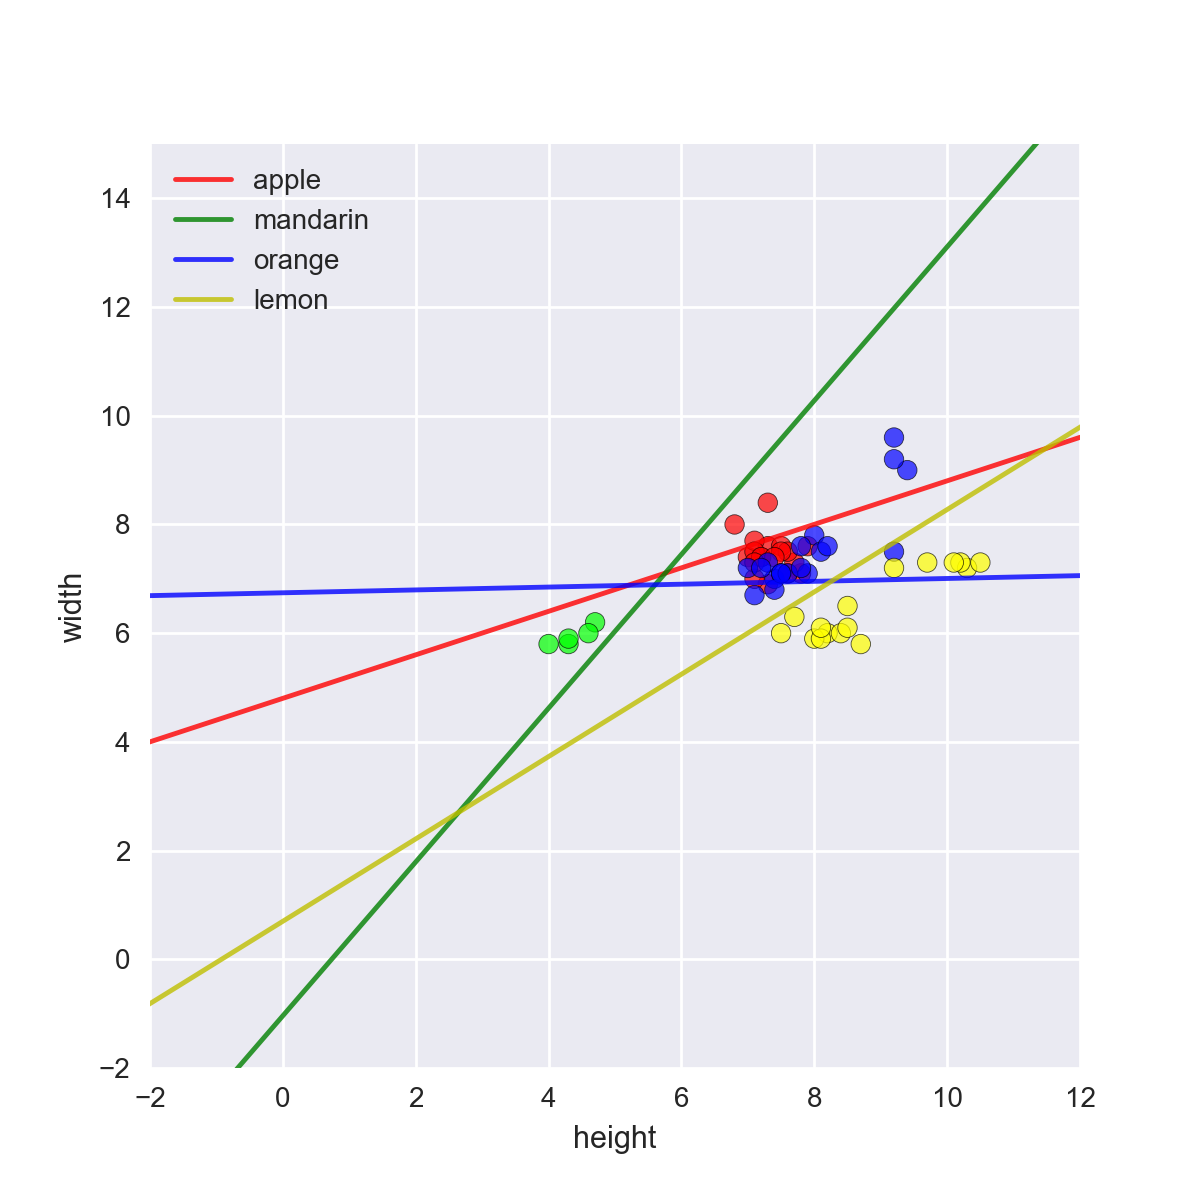

In [95]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

<a id="KSVM"></a> 
## Kernelized Support Vector Machines

Note: This section contains a summary of both video version. 

(Left panel) We've seen how linear support vector machines can be effective tools for classification when the classes are relatively well separated. Or at least separated enough to allow the linear decision boundary to be found that has a maximum margin between the classes. 

(Right panel) However, there are other cases where we have much more complex class structure. Where a linear decision boundary is not really powerful enough to separate the classes. Where the decision boundaries in the space need to be much more complex in order to capture the class structure. So in this module we'll explore what are called kernelized support vector machines that allow much more complex decision boundaries than a simple line or hyperplane. Basically, kernelized support vector machines, which I'll just call SVMs, can provide more complex models that can go beyond linear decision boundaries. As with other supervised machine learning methods, SVMs can be used for both classification and regression. But due to time constraints, we'll focus only on classification in this lecture. We also won't go into the mathematical details of how SVMs operate, but we will give an high level overview that hopefully captures the most important elements of this method. 

(From new vide) **In essence, one way to think about what kernelized SVMs do, is they take the original input data space and transform it to a new higher dimensional feature space, where it becomes much easier to classify the transform to data using a linear classifier.** 

**The basic idea of kernelized support vector machines is to apply what is called a kernel in order to, essentially, take the original data and transform it into a space that makes it easy to apply a linear classifier**. Now the mathematics behind this approach are beyond the scope of this course. But, using some examples and some discussion about effective different choices of kernel, we'll get a general sense for how effective kernelized support vector machines can be on these more complex types of problems. 
 
<img src="module2_svmkernel_1.png" alt="jupyter" style="width: 600px;"/> 


Let's start with a simple example where we have two classes in one dimension. So each point is associated with a single real number along the real number line. And our goal here is to find a linear classifier that separates these two classes in one dimension. Now this is really easy for, let's say, a one-dimensional support vector machine. It would simply find the pair of points where it could find the separator with maximum margin. And in this case It might be here. And I've set up this problem so that the maximum margin decision boundary is at x = 0, just to make things a little simpler in the example. Okay, so this was no problem at all for a linear support vector machine. 

<img src="module2_svmkernel_2.png" alt="jupyter" style="width: 600px;"/> 

What happen though when we change the problem slightly, so that now one of the classes occurs on both sides of the other class? So this is much more perplexing problem for the linear classifier. There's really no linear classifier that can separate these two classes now, completely. 

So how can we fix this? Well, this is where the idea of transforming the data comes in. So the idea is we'll take the data that's in the original space. And transform it into a new feature space where it is possible to do linear classification using a linear classifier. And we can apply a real simple transformation here.

<img src="module2_svmkernel_3.png" alt="jupyter" style="width: 600px;"/> 

So suppose we took every point, And mapped it to a two-dimensional point by adding the square of that value as the second feature. So here we're mapping a one-dimensional feature to a pair of feature. There's two-dimensional space. Very simple transformation, a quadratic transformation. And we can see that by just making the simple transformation of the data, now we can apply a two-dimensional support vector machine that can separate these points in this transformed feature space. And it's this basic idea in slightly more sophisticated form that underlies kernelized support vector machines. 

<img src="module2_svmkernel_4.png" alt="jupyter" style="width: 600px;"/>

So this is in the transformed feature space after, We've added the second quadratic feature to the original data points. We can think about, actually, what it would look like in the original space. What this decision boundary would look like in the original space. So we can think about if I'm going to draw just a small version of the, Original problem up here. We had, Points of one class here. And then we had some points for the second class, and then we had some points. So this was the original problem. We transformed it into this quadratic feature space. And if we were to then transform these points back to the original one-dimensional feature space, the decision boundary in this case would look something like this, okay? So this idea can be applied very generally in machine learning.

<img src="module2_svmkernel_5.png" alt="jupyter" style="width: 600px;"/>

We can now learn a linear support vector machine in this new, 2-deminsional feature space, whose maximum margin decision boundary might look like this here to correctly classify the points.  Any future 1-dimensional points for which we'd like to predict the class, we can just create the 2-deminsional transformed version and predict the class of the 2-deminsional point, using this 2-deminsional linear SVM. If we took the inverse of the transformation we just applied to bring the data points back to our original input space, we can see that the linear decision boundary in the 2-deminsional space corresponds to the two points where a parabola crosses the x-axis.

<img src="module2_svmkernel_5.1.png" alt="jupyter" style="width: 600px;"/>

Now just so that this very important idea is clear, let's move from a 1-dimensional problem to a 2-deminsional classification problem. You can see the same powerful idea in action here. Here we have two classes represented by the black and the white points. Each of which has two features, $x_0$ and $x_1$. The points of both classes are scattered around the origin (0,0) in a 2-deminsional plane. The white points form a cluster right around (0,0), that's completely surrounded by the black points. Again, this looks to be impossible for a linear classifier, which in 2-deminsional space is a straight line, to separate the white points from the black points with any degree of accuracy. 

<img src="module2_svmkernel_5.2.png" alt="jupyters" style="width: 600px;"/>

But just as we did in the 1-dimensional case, we can map each 2-deminsional point ($x_0$,$x_1$) to a new 3-deminsional point by adding a third feature. Mathematically $1-(x_{0}^2 + x_{1}^2)$, and this transformation acts to shape the points into a parabaloid around (0,0). Now the wide points since they're close to (0,0), get mapped to points with higher vertical z values, that new third feature that are close to 1. While the black points which are farther from (0,0) get mapped to points with z values that either close to 0 or even negative. 

<img src="module2_svmkernel_5.3.png" alt="jupyter" style="width: 600px;"/>

With this transformation, it makes it possible to find a hyperplane. Say, z = 0.9, that now easily separates the white data points that are near z = 1 from most or all of the black data points. Finally, the decision boundary consists of the set of points in 3-deminsional space where the paraboloid intersects the maximum margin hyperplane decision boundary. This corresponds to an ellipse-like decision boundary in 2-deminsional space that separates the white points from the black points in the original input space.  

<img src="module2_svmkernel_5.4.png" alt="jupyter" style="width: 600px;"/>

**This idea of transforming the input data points to a new feature space where a linear classifier can be easily applied, is a very general and powerful one**. Here's another example of a more sophisticated situation where, again, the idea is to transform the data into a space. Where it becomes easy for a linear classifier to find a separation between the classes. So the kernel is a function. Mathematically it's an inner product, or a similarity function, that effectively makes this transform happen. So with different choices of kernels you get different types of transformations of the data into this new feature space. There are lots of different possible transformations we could apply to data. And the different kernels available for the kernelized SVM correspond to different transformations. Here we're going to focus mainly on what's called the radial basis function kernel, which we'll abbreviate as RBF. And also look briefly look at something called a polynomial kernel, that's also included with scikit-learns SVM module.

<img src="module2_svmkernel_6.png" alt="jupyter" style="width: 600px;"/>

The kernel function in an SVM tells us, given two points in the original input space, what is their similarity in the new feature space? 

For the **radial basis function kernel**, the similarity between two points and the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown by the formula here. So what does the radial basis function feature transformation look like? Well, this diagram should give an intuitive idea. And again this diagram is for illustration purposes only and it's just an approximation, but essentially you can think of it in a similar way to the 2-deminsional to 3-deminsional example we saw earlier. 
 
So on the left, is a set of samples in the input space. The circles represent the training points of one class and the squares represent training points of a second class. On the right, the same samples are shown in the transformed feature space. Using the radial basis function kernel in effect, transforms all the points inside a certain distance of the circle class to one area of the transformed feature space. And all the points in the square class outside a certain radius get moved to a different area of the feature space. 

The dark circles and squares represents the points that might lie along the **maximum margin for a support vector machine in the transformed feature space**. And also, it shows the corresponding points in the original input space. So just as we saw with the simple 1D and 2D examples earlier, **the kernelized support vector machine tries to find the decision boundary with maximum margin between classes using a linear classifier in the transformed feature space not the original input space**. 

The linear decision boundary learn feature space by linear SVM corresponds to a non-linear decision boundary In the original input space. So in this example, an ellipse like closed region in the input space. Now, **one of the mathematically remarkable things about kernelized support vector machines, something referred to as the kernel trick, is that internally, the algorithm doesn't have to perform this actual transformation on the data points to the new high dimensional feature space. Instead, the kernelized SVM can compute these more complex decision boundaries just in terms of similarity calculations between pairs of points in the high dimensional space where the transformed feature representation is implicit. This similarity function which mathematically is a kind of dot product is the kernel in kernelized SVM.** And for certain kinds of high dimensional spaces, the similarity calculation between points, the kernel function can have a simple form like we see with the radial bases function calculation. This makes it practical to apply support vector machines, when the underlying transformed feature space is complex or even infinite dimensional. Even better, we could easily plug in a variety of different kernels choosing one to suit the properties of our data. Again, **different choices of kernel correspond to different types of transformations to that higher dimensional feature space**. 

<img src="module2_svmkernel_7.png" alt="jupyter" style="width: 600px;"/>

Here's the result of using a support vector machine with RBF kernel, on that more complex binary classification problem we saw earlier. l. And then something called a **polynomial kernel with a support vector machine** looks like in practice. So on that complex problem that we saw, where a linear classifier simply couldn't find a good decision boundary between these two classes by applying either a radial basis kernel or a polynomial kernel with the kernelized support vector machine. Now you can see that we have found decision boundaries that do separate out the classes quite well. 

Now, because the nature of the transformation that these two kernels provide is somewhat different, the decision boundaries that correspond to those mappings in the original data space look a little bit different. But you can see that they both do a reasonable job. Certainly, a much better than a linear classifier could do at capturing the complex separation that's needed for this problem.  

<img src="module2_svmkernel_9.png" alt="jupyter" style="width: 600px;"/>


### Classification

There is an SVC parameter called kernel, that allows us to set the kernel function used by the SVM. 
By default, the SVM will use the radial base's function, but a number of other choices are supported. 
Here in the second example and plot, we show the use of the polynomial kernel instead of the RBF kernel. 

The polynomial kernel, using the kernel poly setting, essentially represents a future transformation similar to the earlier quadratic example. In the lecture, this future space represented in terms of futures that are polynomial combinations of the original input features, much as we saw also for linear regression. 

The polynomial kernel takes additional parameter degree that controls the model complexity and the computational cost of this transformation. 

<IPython.core.display.Javascript object>


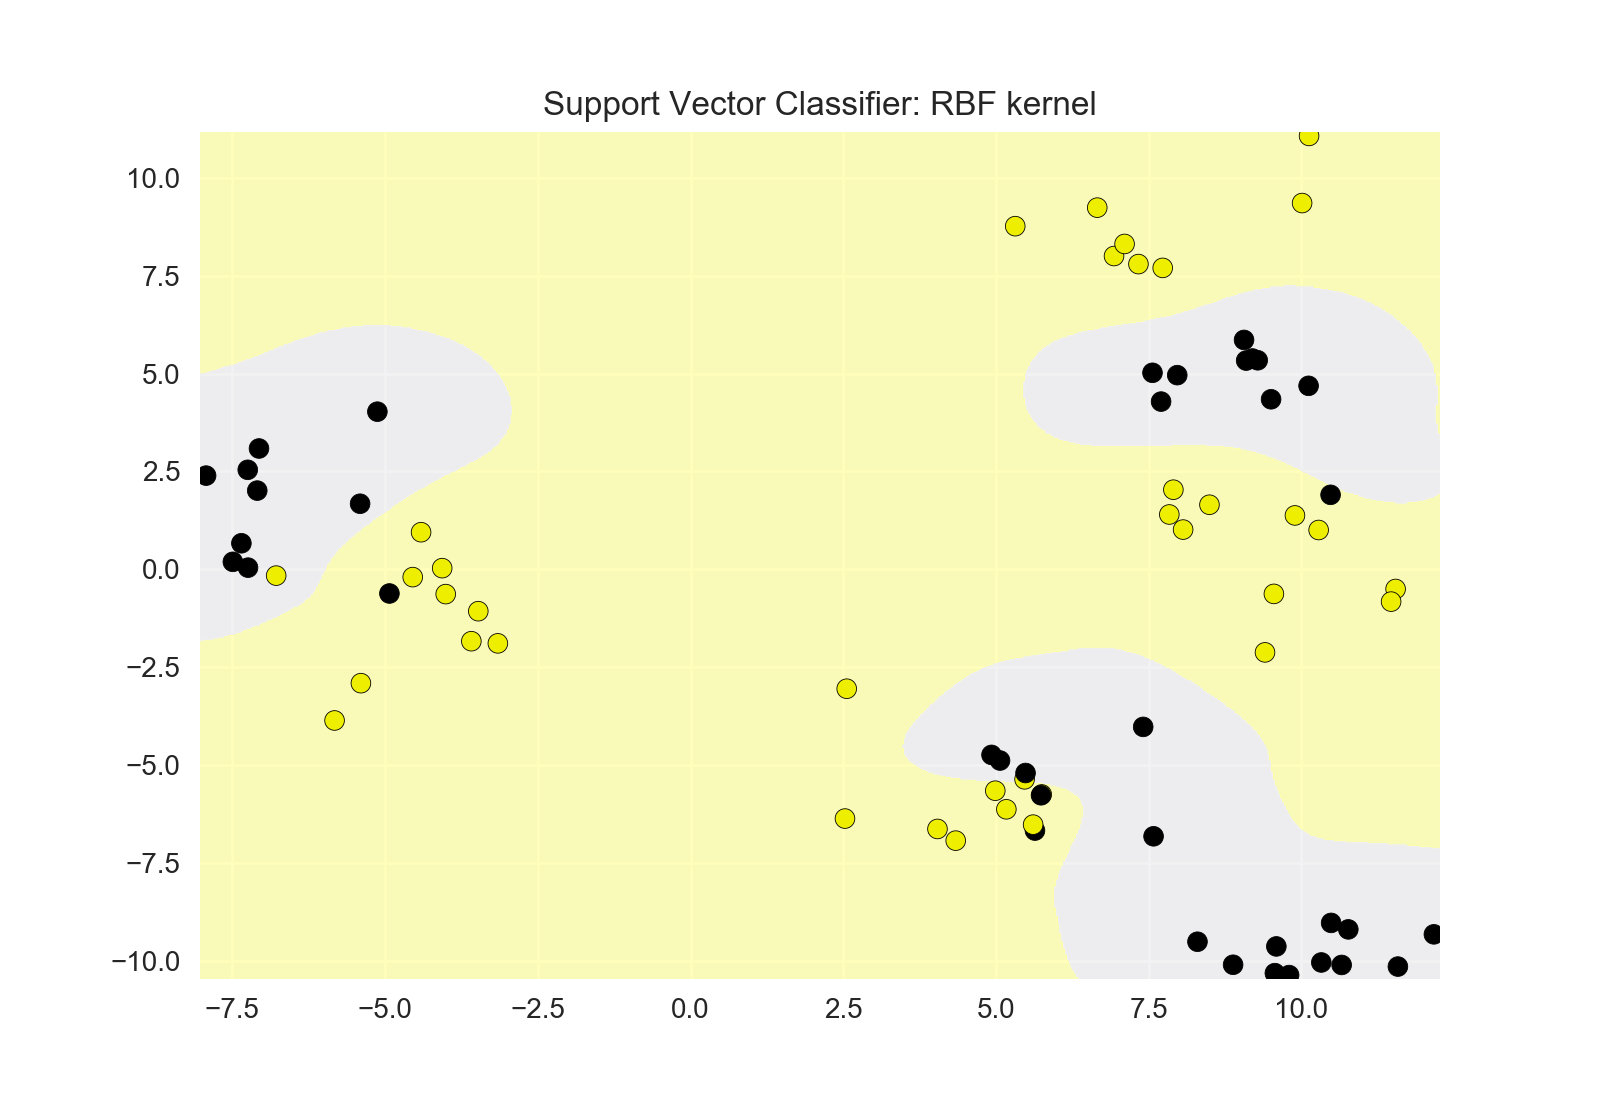

<IPython.core.display.Javascript object>


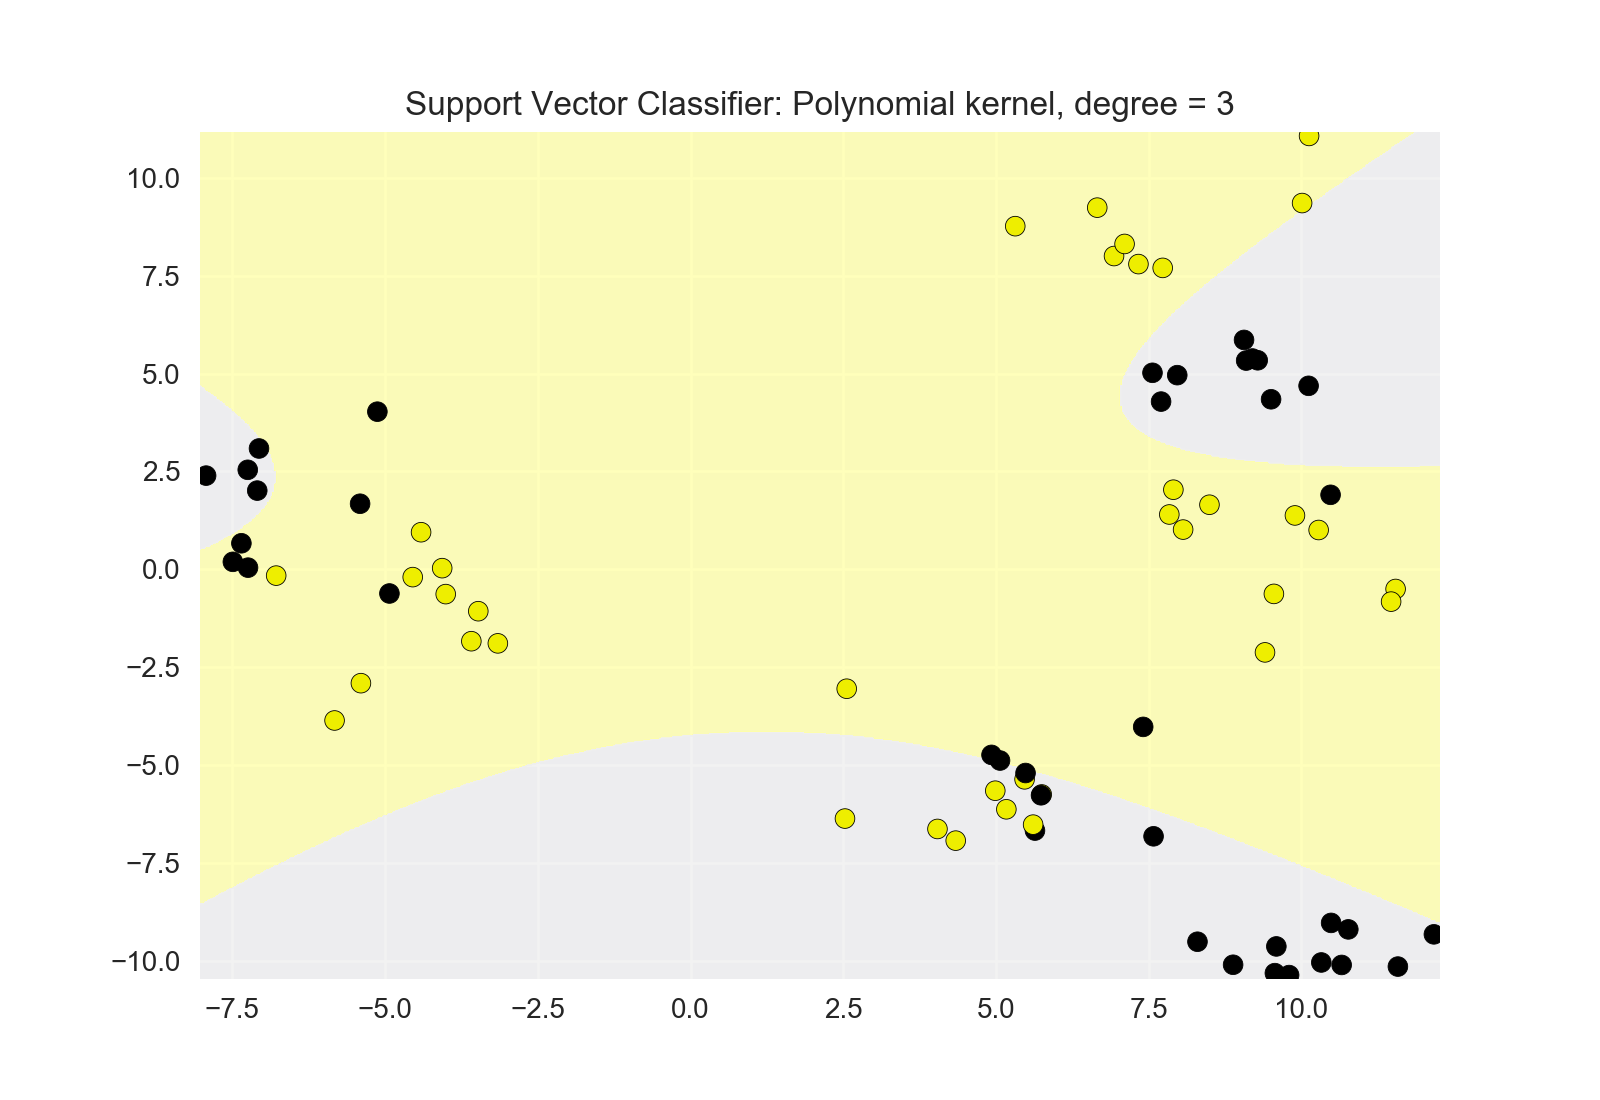

In [96]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
# X_D2, y_D2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3).fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with (Radial Basis Function) RBF kernel: gamma parameter

[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
gamma : float, optional (default=’auto’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

You may have noticed that the RBF kernel has a parameter $\gamma$. 

$\gamma$ controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. **Small $\gamma$ means a larger similarity radius. So that points farther apart are considered similar**. Which results in more points being group together and smoother decision boundaries. 

On the other hand for **larger values of $\gamma$, the kernel value to K is more quickly and points have to be very close to be considered similar. This results in more complex, tightly constrained decision boundaries**. 

<img src="module2_svmkernel_10.png" alt="jupyter" style="width: 600px;"/>


You can see the effect of increasing $\gamma$ that is sharpening the kernel in this example from the notebook. 
Small values of $\gamma$ give broader, smoother decision regions. While larger values of gamma give smaller, more complex decision regions. 

<img src="module2_svmkernel_11.png" alt="jupyter" style="width: 600px;"/>

<IPython.core.display.Javascript object>


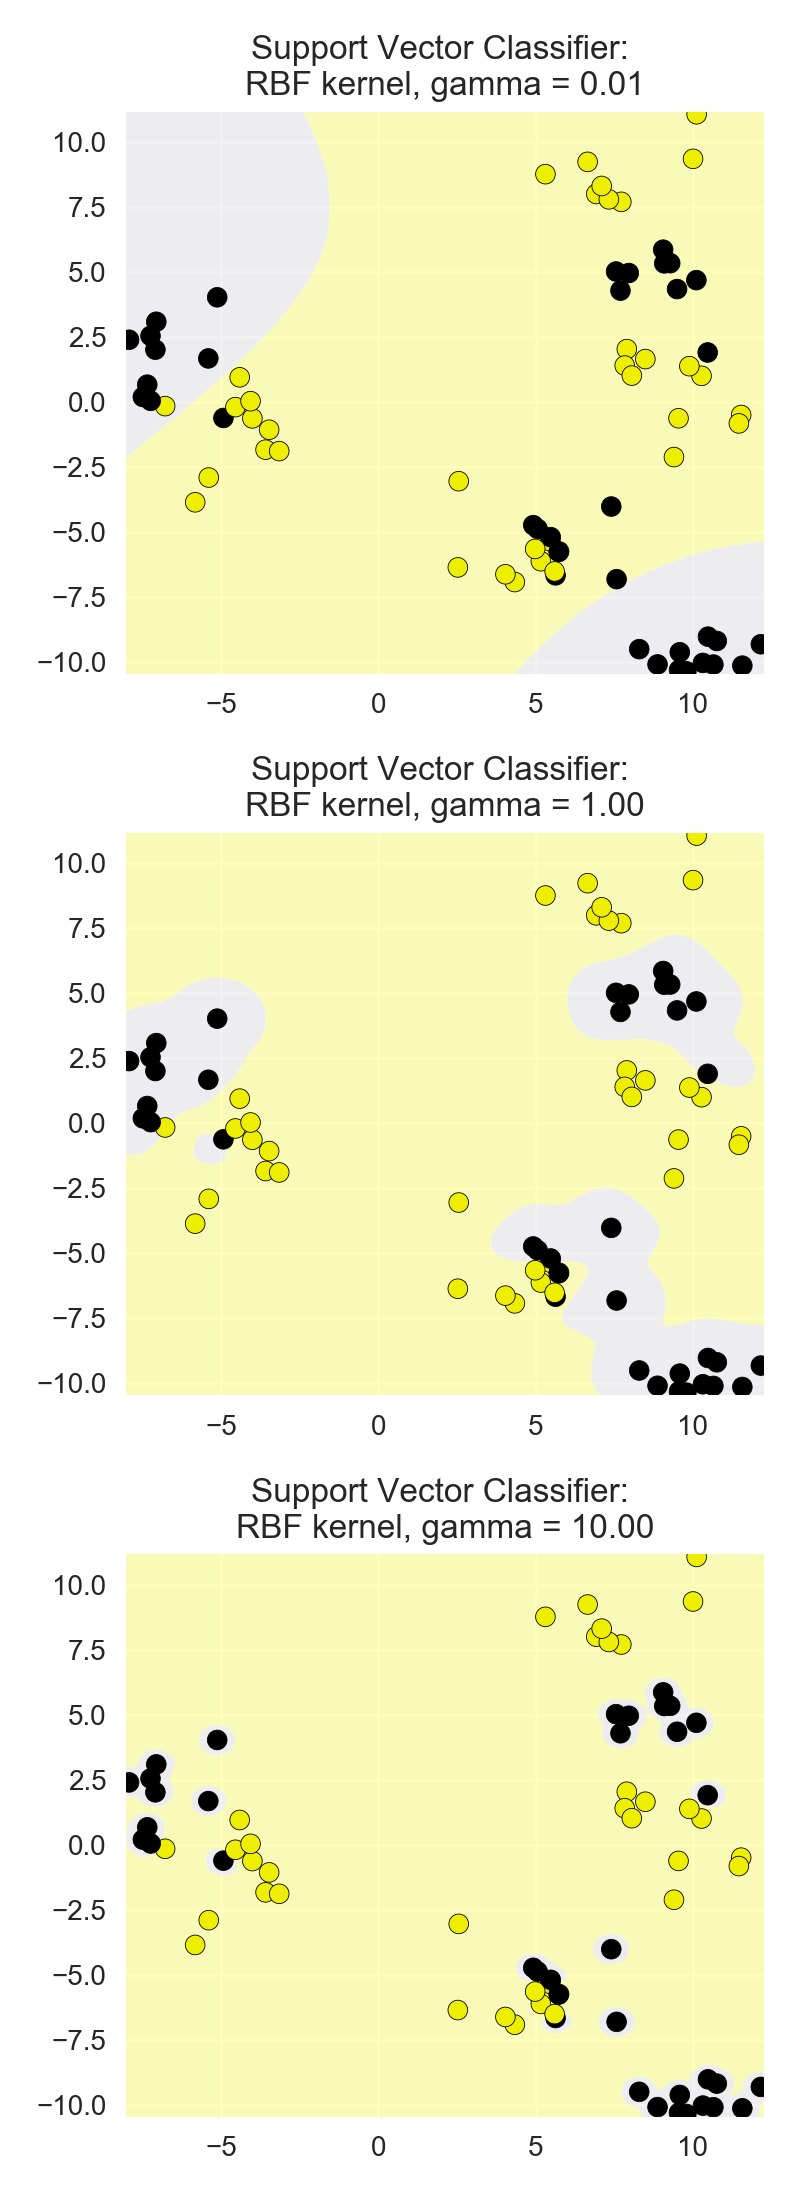

In [97]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))
print(subaxes)
for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

Model complexity increases from left to right (bias to variance). It seems that the bets test score of 88% is obtained with C=15 and gamma=1.0.

You can set the $\gamma$ parameter when creating the SVC object to control the kernel width in this way, as shown in this code. You may recall from linear SVMs that SVMs also have a regularization parameter, C, that controls the tradeoff between satisfying the maximum margin criterion to find the simple decision boundary, and avoiding misclassification errors on the training set. The C parameter is also an important one for kernelized SVMs, and it interacts with the $\gamma$ parameter. 


This example from the notebook shows the effect of varying C and gamma together. If $\gamma$ is large, then C will have little to no effect. Well, if $\gamma$ is small, the model is much more constrained and the effective C will be similar to how it would affect a linear classifier. 

Typically, $\gamma$ and C are tuned together, with the optimal combination typically in an intermediate range of values. For example, $\gamma$ between 0.0001 and 10 and C between 0.1 and 100. Though the specifical optimal values will depend on your application. 

<img src="module2_svmkernel_12.png" alt="jupyter" style="width: 600px;"/>

<IPython.core.display.Javascript object>


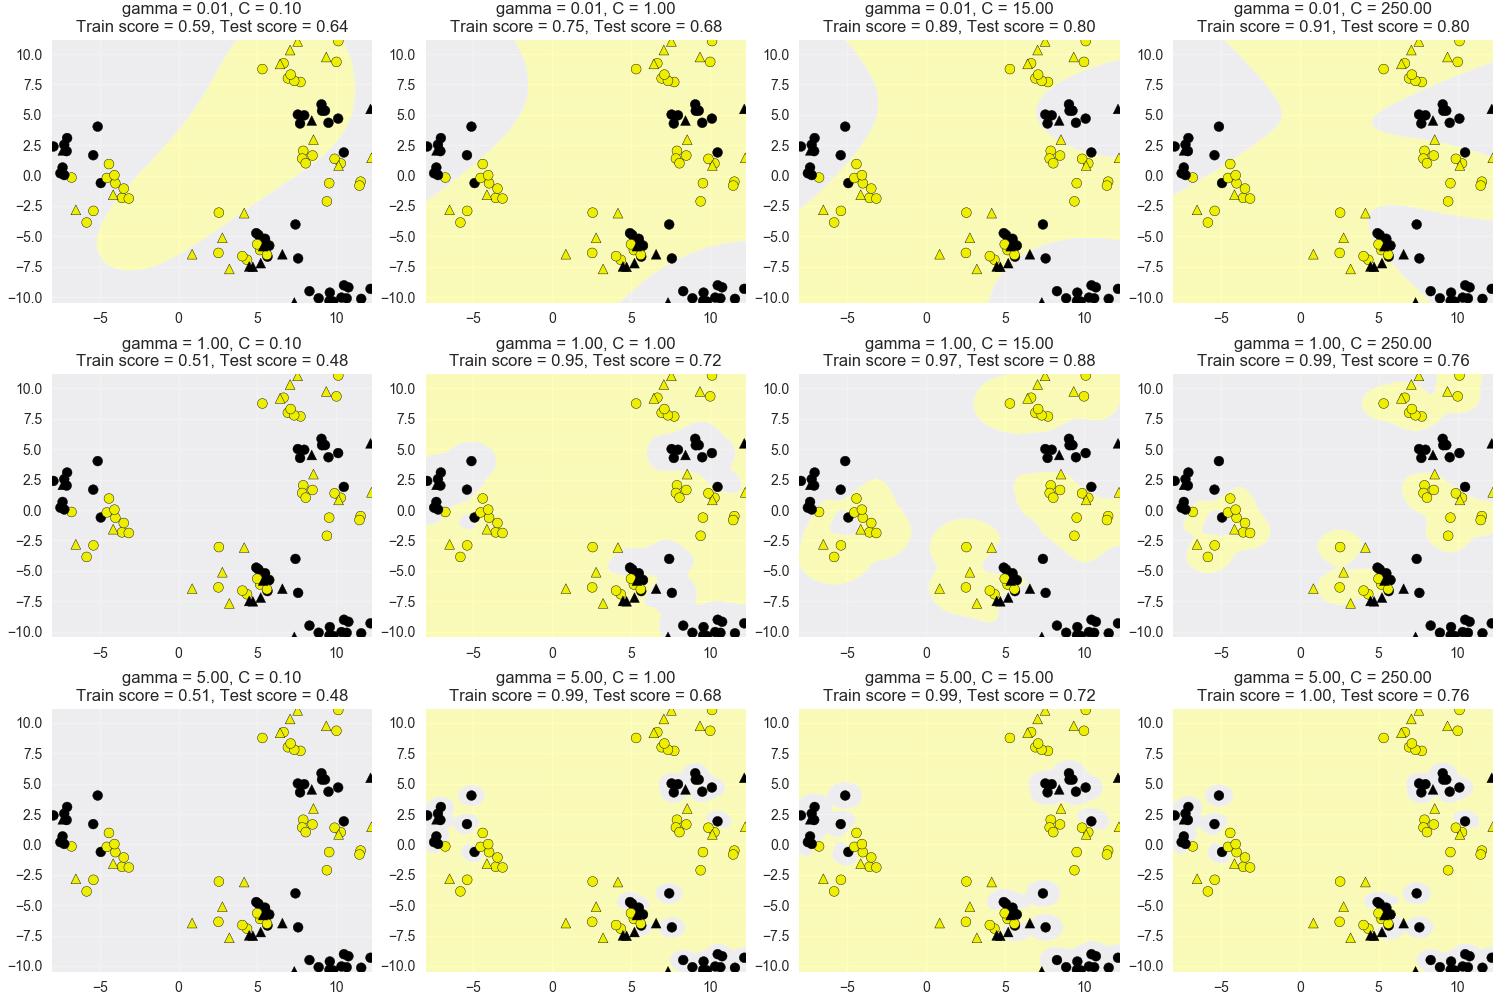

In [98]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

Kernelized SVMs are pretty sensitive to settings of gamma. The most important thing to remember **when applying SVMs is that it's important to normalize the input data, so that all the features have comparable units that are on the same scale**. We saw this earlier with some other learning methods like regularized regression. 

<img src="module2_svmkernel_13.png" alt="jupyter" style="width: 600px;"/>

Let's apply a support vector machine with RBF kernel to a real world dataset to see why this normalization is important. Here, we'll apply a support vector machine with RBF kernel to the breast cancer dataset. Note that we're not touching the input data in anyway, we're simply passing in the raw values. We can see the results with training set accuracy of 1.00 and the test set accuracy of 0.63 that show that the support vector machine is over fitting. It's doing well on the training data, but very poorly on the test data. 

In [99]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

Now let's add a MinMaxScaler transformation of the training data. Remembering to also apply the same scaler to the test data. After this scaler has been applied, all the input features now lie in the same range zero to one. And looking at these new results, the tests set accuracy is much, much higher, 96%. This illustrates what a huge difference normalizing the features of the training data can have on SVM performance. 

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


Let's review the strengths and weaknesses of support vector machines. 

* On the **positive side**, support vector machines perform well on a range of datasets, and have been successfully applied on data that ranges from text to images and many more types. 

* The support vector machine's also potentially very versatile, due to its ability to specify different kernel functions, including possible custom kernel functions depending on the data. 

* Support vector machines also typically work well for both low and high-dimensional data. Including data with hundreds, thousands or even millions of sparse dimensions. This makes it well suited to test classification for example. 

* On the **negative side** as the training set size increases, the run time, speed, and memory usage in the SVM training phase also increases. So for a large datasets with hundreds of thousands, or millions of instances, an SVM may become less practical. 

* As we saw when applying a support vector machine to a real world dataset, using an SVM requires careful normalization of the input data as well as parameter tuning. The input should be normalized that all features have comparable units and around similar scales if they aren't already. 

* Support vector machines also don't provide direct probability estimates for predictions, which are needed for some applications. Now, there are ways to estimate these probabilities using techniques such as **Platt Scaling** ([1](http://scikit-learn.org/stable/modules/calibration.html), [2](https://en.wikipedia.org/wiki/Platt_scaling)), which transforms the output of the classifier to a probability distribution over classes by fitting a logistic regression model to the classifiers course. Finally, it could be difficult to interpret the internal model parameters of a support vector machine. Which means the applicability of support vector machines in scenarios where interpretation is important for people may be limited when we want to understand why a particular prediction was made. 

<img src="module2_svmkernel_14.png" alt="jupyter" style="width: 600px;"/>


As a reminder, there are three main parameters that control model complexity for kernelized SVMs. 

* First, there's the kernel type which defaults to RBF for radial basis function. But several other common types are available in scikit-learns SVC module. 

* Second, each kernel has one or more kernel specific parameters that control aspects like the influence of training points according to their distance. 

* In the case of the RBF kernel, SVM performance is very sensitive to the setting of the $\gamma$ parameter that controls the kernel width. 

* Finally, for any support vector machine, the C: regularization parameter operates as we've discussed before. And it's typically tuned with the kernel parameters such as $\gamma$ for optimal performance. 

<img src="module2_svmkernel_15.png" alt="jupyter" style="width: 600px;"/>


<a id="CV"></a> 

## Cross-validation
When we applied the supervise learning methods, we follow a consisten serie of steps:
* First we partition the data into training and test sets, using the train test split function.
* Then colling the fit method on the training set to estimate the model
* Finnaly apply the model by using the predict method to estimate the targe value for the new data istances or by using the score method to evaluate the train model's performance on the test set.

The reason of dividing the data into training and test sets, was to use the test set as a way to estimate how well the model trained on the training data will generalises to new previuosly unseen data. The test set represent data that have not been seen during training, but hs the same general atributes as the orignila data set (it has been drawn from the same underline distribution as the training set). Cross validation, is a method that goes beyond evalueting a single model using a single train/test split of the data, by using multiple train/test splits each of which is used to train and evaluate a separate model. 

Why is it better than a single train/test split? 
You might have notice, that by chosing different values for the random state C paramenter in the train test split function, that the accuracy score that you get of what is learning from a classifier it can vary quite a bit just by chance dependin on specific samples that happened end up in the training set. Corss validation basically  gives more stable and reliable estimates of how the classifier is likely to perfomr in average, by running multiple different training splits and averaging the results, instead of relaying entirely in a single training set.

Here is a graphycal illustration of how cross validation operates on data.The most common is k-fold corss validation. Must common with k set to 5 or 10. This is an example of 5 fold cross validation. The original data set is partitioned in 5 parts of equal or close to equal size. Each of this part is called a fold. Model 1 will use fold 2 to 5 as traning set, and evaluating using fold 1 as Test set. The second model will use Fold 1 and Fold 2 to 5 as training set and Fold 2 as test set, and so on. When the prcess is done, we have five accuracy values , one per fold. Lets check in the next cell.
<img src="module2_crossvalidation_1.png" alt="jupyter" style="width: 600px;"/>

### Example based on k-NN classifier with fruit dataset (2 features)
The parameters of ``cross_val_score`` are the model you want to evaluate, the data set, and the corresponding "ground truth target labels of values". By default, it does 3-fold cross validation. To change the size of fold, we can set the cv parameter as cv=10. **It is typical to compute the mean of all the accuracy scores across the folds, and report the mean validation score as a measure of how accurate we expect the model to be in average**. One benefit of computing the accuracy of a model on multiple spits instead of a single split, it gives us potential useful information about how sensitive the model is on the nature of a specific training set. We can look at the distribution of these multiple scores across all the cross validation folds to see how likely it is that by chance the model would perform very badly or very well on a new data set. So we can do make a rank of the performances of the multiple socres. The exta information comes with extra cost, it takes more time and computation to do cross validation. If we perform K-fold CV, and we do not compute the K fold in parallel it will take K times as long to get the scores if we were working with one train split. However, the gain in our knowledge of how the model is likely to perform in future data is usually well worth this cost.

In [101]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.77  0.74  0.83]
Mean cross-validation score (3-fold): 0.781


In the default CV set up, to use 5-folds. The fist 20% is used for the 1st fold, the next 20% for the second fold and so on. One problem with this is that the data migh be crated in such a way that the records are sorted or at least showng a bias in the class label. 
<img src="module2_crossvalidation_2.png" alt="jupyter" style="width: 600px;"/>
If you look at the fruit dataset, it happens that all the labels for classes 1 and 2 (apples and oranges) come before classes 3 and 4 in the data file. If we simple took the first 20% of records for fold-1, that should be used as Test set to evaluate model one, it will evaluete the classifier only on class 1 and 2 exmples and not at all on the other clasees 3 and 4. It greatly reduce the informativeness of the evaluation. **So when you ask to sklern to do cross validation for a classification task, it actually does instead what is called stratify cross valiadation. It menas that when splitting the data, the proportion of classes in each fold are made as closed possible to the actual proportion of the classes in the overall data set**. As shown in the next figure bellow. For regression, sklern uses regular k-fold cross validation. Since the concept of perserivng class porportions is something relevant for everyday regression problems.
<img src="module2_crossvalidation_3.png" alt="jupyter" style="width: 600px;"/>

One extreme is to do something called "Leave-one-out" CV, which is k-fold vross validation, with K set to the n umber of data samples in data set. Each fold cosist of a single sample as the test set, and the rest of data as the traing set. It uses more computation, but for small data sets can provide an improve probe estimates because it gives the maximum puzzle among the training data to a model. It might help the prrformance of the model when the training sets are small.

<img src="module2_crossvalidation_4.png" alt="jupyter" style="width: 600px;"/>

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, **scaling/normalizing must be computed and applied for each cross-validation fold separately**.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media). It is in the section Algorithm Chains and Pipelines page 305.




## Validation curve example
Sometimes we want to evaluate the effect of a parameter that a model has on the cross validation scores. The useful function ``valiadatio_curve`` make it easier to run this type of experiment. Like ``cross_val_score``, ``valiadatio_curve`` will do k-3 fold by default, but it can be adjusted with cv parameter. Unlike ``cross_val_score`` you can also specify a classifier, parameter name, and set parameter values that you want to sweap cross (``param_range `` array of parameter values to take on). This will return two dimensional arryas corresponding to evaluation on training set and test set. Each array has one row per parameter value and sweap, and the number of columns is the number of cross validation folds we used. As reminder, that CV is used to evaluate the model, and not learn or tune a model. To do model tunning, we will use something called "Grind search"    

<img src="module2_crossvalidation_5.png" alt="jupyter" style="width: 600px;"/>

<img src="module2_crossvalidation_6.png" alt="jupyter" style="width: 600px;"/>


In [107]:
# This code will feed three models using a RBF using SVM on different subests of the data corresponding to the 
# three different specify values of the kernel gamma parameter.  It will returns 2 (4x3) arrays, that is 4 levels 
# of gamma and times 3 fits per level containing the results of the training and test sets. It can give you an idea
# of hose sensitive the performance of the model is to changes to the given parameters. The x-axis correponds to values
# of the parameter, and the y-axis gives the evaluation score (accuraccy in a classifier)
# It is taking the fruis data with two features and y has the lables
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Gamma values : array([  1.00e-03,   1.00e-01,   1.00e+01,   1.00e+03])
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [106]:
param_range = np.logspace(-3, 3, 4)
param_range

array([  1.00e-03,   1.00e-01,   1.00e+01,   1.00e+03])

In [108]:
print(train_scores)

[[ 0.49  0.42  0.41]
 [ 0.84  0.72  0.76]
 [ 0.92  0.9   0.93]
 [ 1.    1.    0.98]]


In [109]:
print(test_scores)

[[ 0.45  0.32  0.33]
 [ 0.82  0.68  0.61]
 [ 0.41  0.84  0.67]
 [ 0.36  0.21  0.39]]


<IPython.core.display.Javascript object>


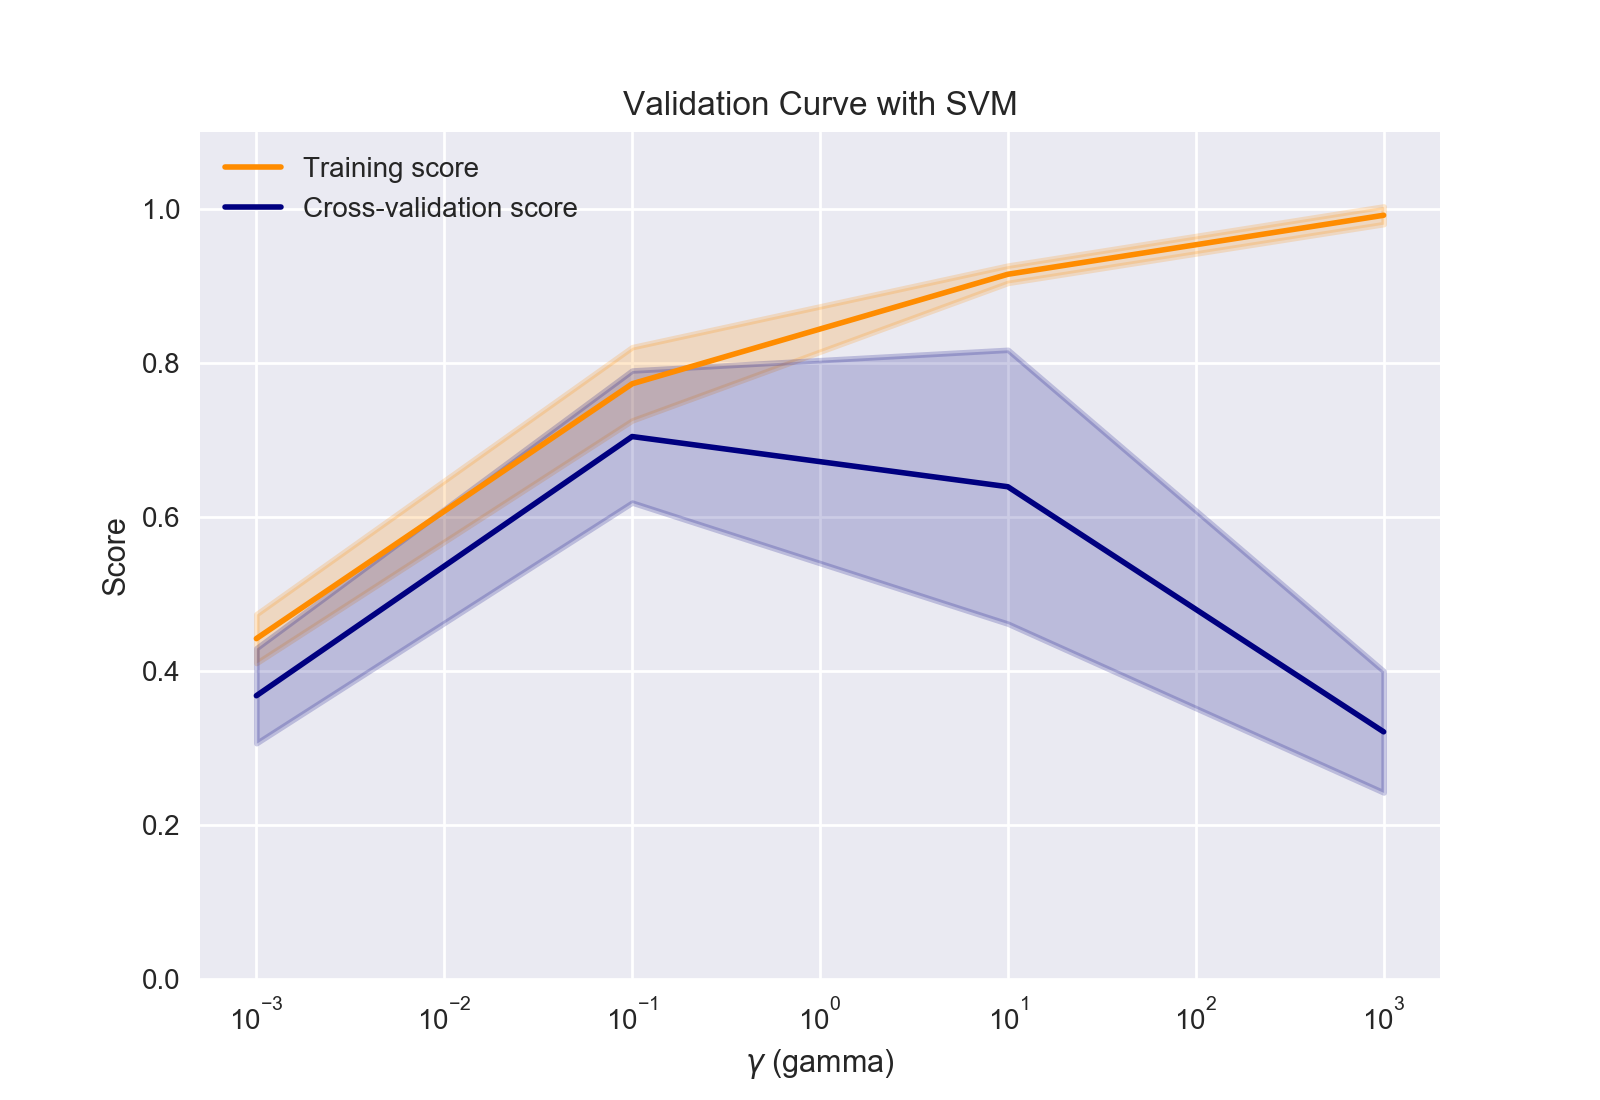

In [110]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

<a id="DST"></a> 
## Decision Trees
This a popular supervise learning method that can be used for classification and regression. They are easy to use and understand and are often a good exploratory method if you are interested in getting a better idea about what the influencial features are in your data set. **Descition Trees learns a series of explicit If Then rules on features values that results in the descition that predicts theatarget value**. For example, when you try to guess what the other perosn is thinking by asking not and yes questions(See bellow)
<img src="module2_trees_1.png" alt="jupyter" style="width: 600px;"/>

We can form these questions into a tree with **node respresenting one question** and the **yes/not possible answears** as the left and right **branches from  that node**. That conect the noce to the next leavel of the tree. One question being answered at each level. **At the bottom of tree are nodes called "leafe nodes" that repressent actual objects as the possible answers**. For any object there is a path from the root of the tree to the object that is determined by the answers at each level (Look at the red answers on the image bellow). This can be seen as a descition tree to classify an object. Rather than trying to figure out these rules manually for every task, there are supervise algorithms that can learned for in a way that gets accurate descition quickly. Lets see an example with the Iris data set.

<img src="module2_trees_2.png" alt="jupyter" style="width: 600px;"/>

Each instance in the data set represents one of the three different species of iris. There are four atributes or features for each isntance: sepal (legth, width in cm), petal (legth, width in cm). We want to predict which of the species belongs certain flower given certain instances (measurements). The Iris data set features are continues values. The rules to be learned will be of the form: is the petal leght bigger than 2.5 cm?
<img src="module2_trees_3.png" alt="jupyter" style="width: 600px;"/>

Here it is how a descition tree is built based on the data.The gola in building the descrion treee is to find the sequence of questions that has the best aquracy at classificaying the data in the fewest steps. Looking at the descition tree, each descition splits the tree into two branches base in some feature value being above or bellow a threshold. This threshold is called split point.  
<img src="module2_trees_4.png" alt="jupyter" style="width: 600px;"/>

An important concept is how informative split is. An informative split is the one that separates one class from the others. A less informative split will not produce a clear separation from the others. For the best split the results should produce as homogenius set of classes as posible. There are number of different mathematical ways compute the best split. One criteria used to built a descition tree is called information game.

<img src="module2_trees_5.png" alt="jupyter" style="width: 600px;"/>
**The algorithm starts building a descition tree by fidning a feature that leeds to the most informative split**. For any given split on a particular feture vaule, even for the best split,is likely that some examples will still incorrectly classify or need further splitting. In the Iris data we can be seen this. If we need further split, we improve the accuracy.

<img src="module2_trees_6.png" alt="jupyter" style="width: 600px;"/>
The second splitting is more infomrative because the resulting subsets is more homogeneous. We continue this process recursively until we are left with leaves that all have the same or at least a predominant majority of the target value. Trees whose leaves' nodes each have all the same target value are called **pure**, as opposed to **mix** where the leave nodes area allow to have a mix of the other classes. To predict a class of a new instance given its future measurements we simply start at the root and take the descition at each level base on the appropiate feature measuremnt until we get to a leave node. The prediction is then just majority class of the instances on that leave node.

<img src="module2_trees_7.png" alt="jupyter" style="width: 600px;"/>

For example, in the iris data, a flower that has measurments shown in the the next slide will ended up being classified as follows:

<img src="module2_trees_8.png" alt="jupyter" style="width: 600px;"/>

It can be used also for regression following the same process. **For regession, the leave node prediction will be the mean value of the target values of the training points on that leave**.

In [113]:
# Here it is how to buid a descition tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In this case, the training data is predicted perfectly while the test data looks worts. It is an indication that the **tree is likely overfitting. This is a problem in buiding decistion trees in general, it keeps adding rules until the  leave node are pure**. Tipically such trees area ovely complex andessentially memorise the training data.

One strategy to prevent the tree to becoming reslly deatail and complex by stopping its growth early, this is called **Prepruning**. Another strategy is to built a complete tree by pure leaves but then prune back the tree to a simpler form, it is called **postprunning or prunning**. In **sklern it is implemented just preprunning**. We can controlled tree complexity by limitng the deepth of the tree by using the ``max_depth`` paramenter, or de maximum number of leaf nodes with the ``max_leaf_nodes`` parameter. We can set also a threshold on the minimum number of instances that must be in a node to be consdered splitting it using the ``min_sample_leaf`` parameter.

<img src="module2_trees_9.png" alt="jupyter" style="width: 600px;"/>


#### Setting max decision tree depth to help avoid overfitting

We can see the effect of prepruning by setting on the Iris data max_depth to three. We can see that the accuraccy on the training data is a little worst, but the accuracy on the test data got better. One advatage is that trees are easy to interpreated.

In [114]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

Visualising the descition tree can gives and idea of how it is making its descitions. graphviz labrary visualise the tree and the sklern generated a dot file is generated wich is a text file description of the three and then int is visulised.

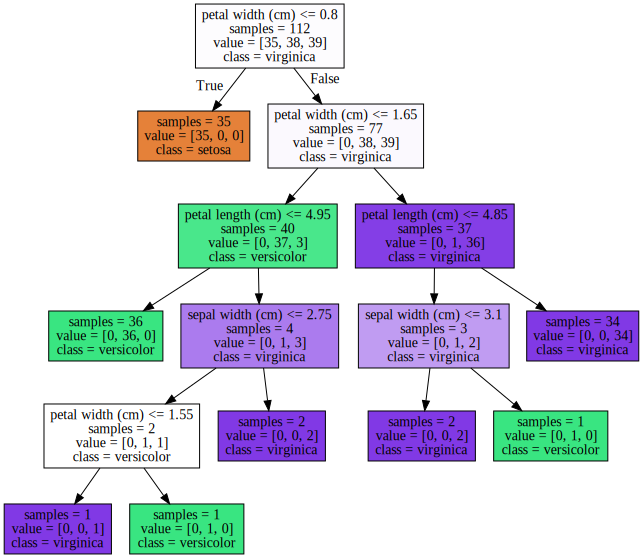

In [116]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

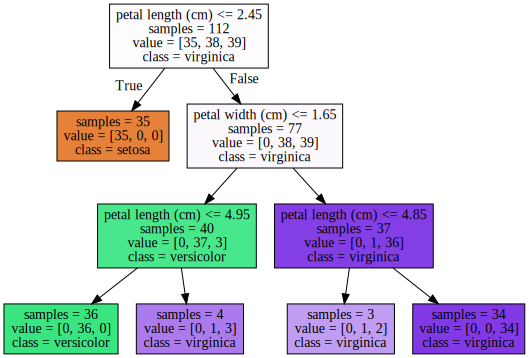

In [117]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

This is the unpruned descition tree of the iris data set. the firts line is the descition rule applied in the node, then the total number of instances for that node, the third line shows the class distribution among those instances, and the forth line shows the majority classs of that node data instances. Then we can see the splits. We used an option on plotting that fill the nodes with colours that indicate the majority class of the instances in that node, the intensity of the color indicates the strength of the majoirty count of that class. For larggerst trees with more of 5 to 10, it is more intesting to look which pathsmost of the data takes. It can be done looking for the largest sample values in the nodes. 
<img src="module2_trees_10.png" alt="jupyter" style="width: 600px;"/>

**Another way of analysing the tree, is to do the feature iportance calculations**. It is one of the most useful and widly use types of summary analisys that you can perfomr in a supervise leaning model. The feature inporntance is between 0 and 1, and it tell you how important that feature is for the overall prediciton accuracy. 
<img src="module2_trees_11.png" alt="jupyter" style="width: 600px;"/>


#### Feature importance

In Sklearn are sorteed in a list in an estimator called ``feature_importances_``.

<IPython.core.display.Javascript object>


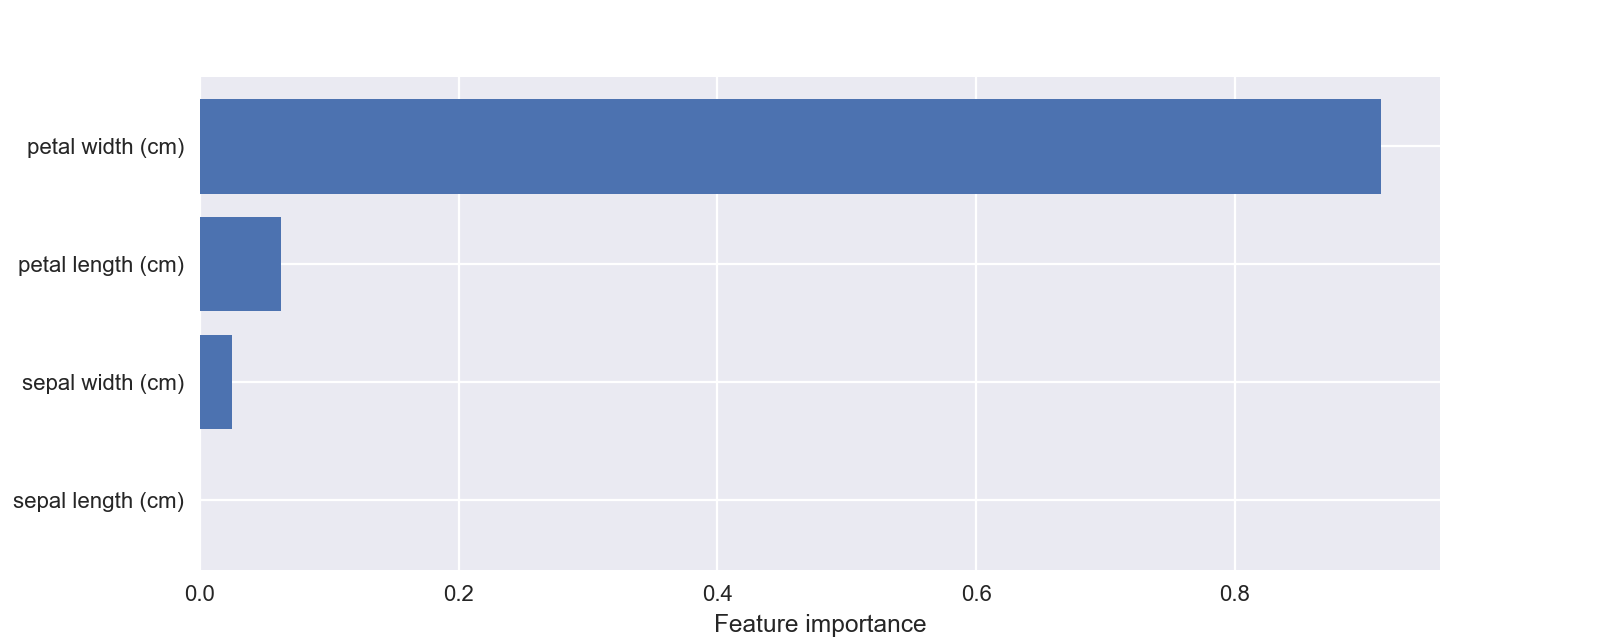

Feature importances: [ 0.    0.02  0.06  0.91]


In [118]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

The petal width has the larggest feature impornca weight. We can confimr by looking the descition tree. It makes a good spliitng that is at the top of the descition tree. A feature with a low importance value, it odes not mean it is not important for the prediction, it just mean that was not chosen at early stage of the level of the tree. It could be because it is higly correlted with another feature and does not provide additional information. Because it can depends on an specific model, it is common to take the average value of the feature iportance when performing cross validation.

<img src="module2_trees_12.png" alt="jupyter" style="width: 600px;"/>

<IPython.core.display.Javascript object>


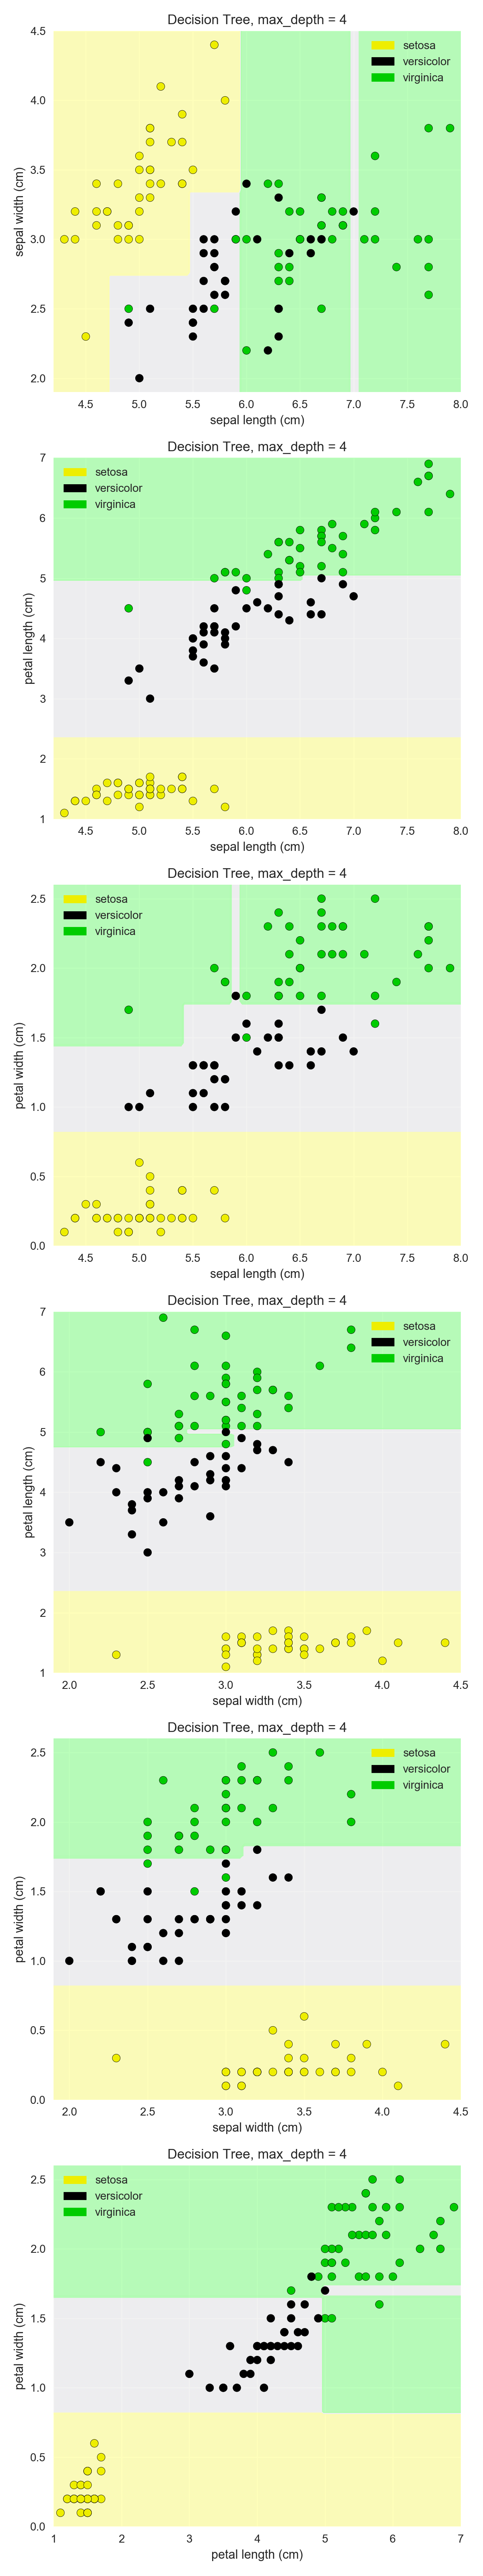

In [119]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

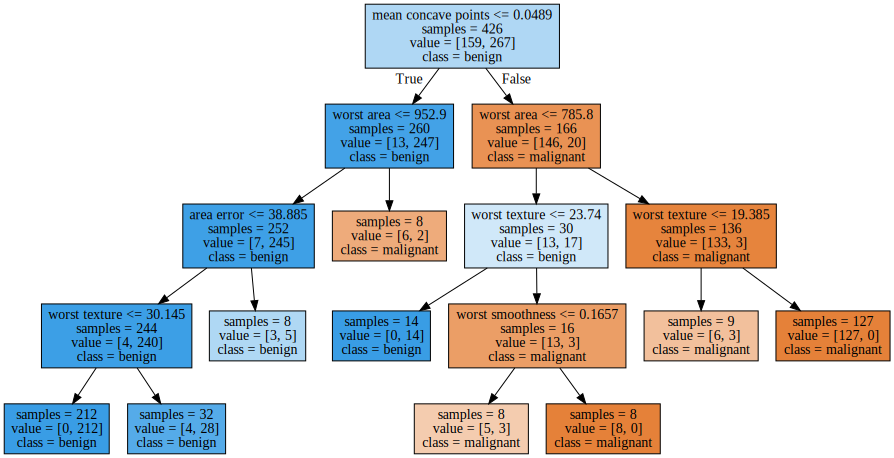

In [120]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


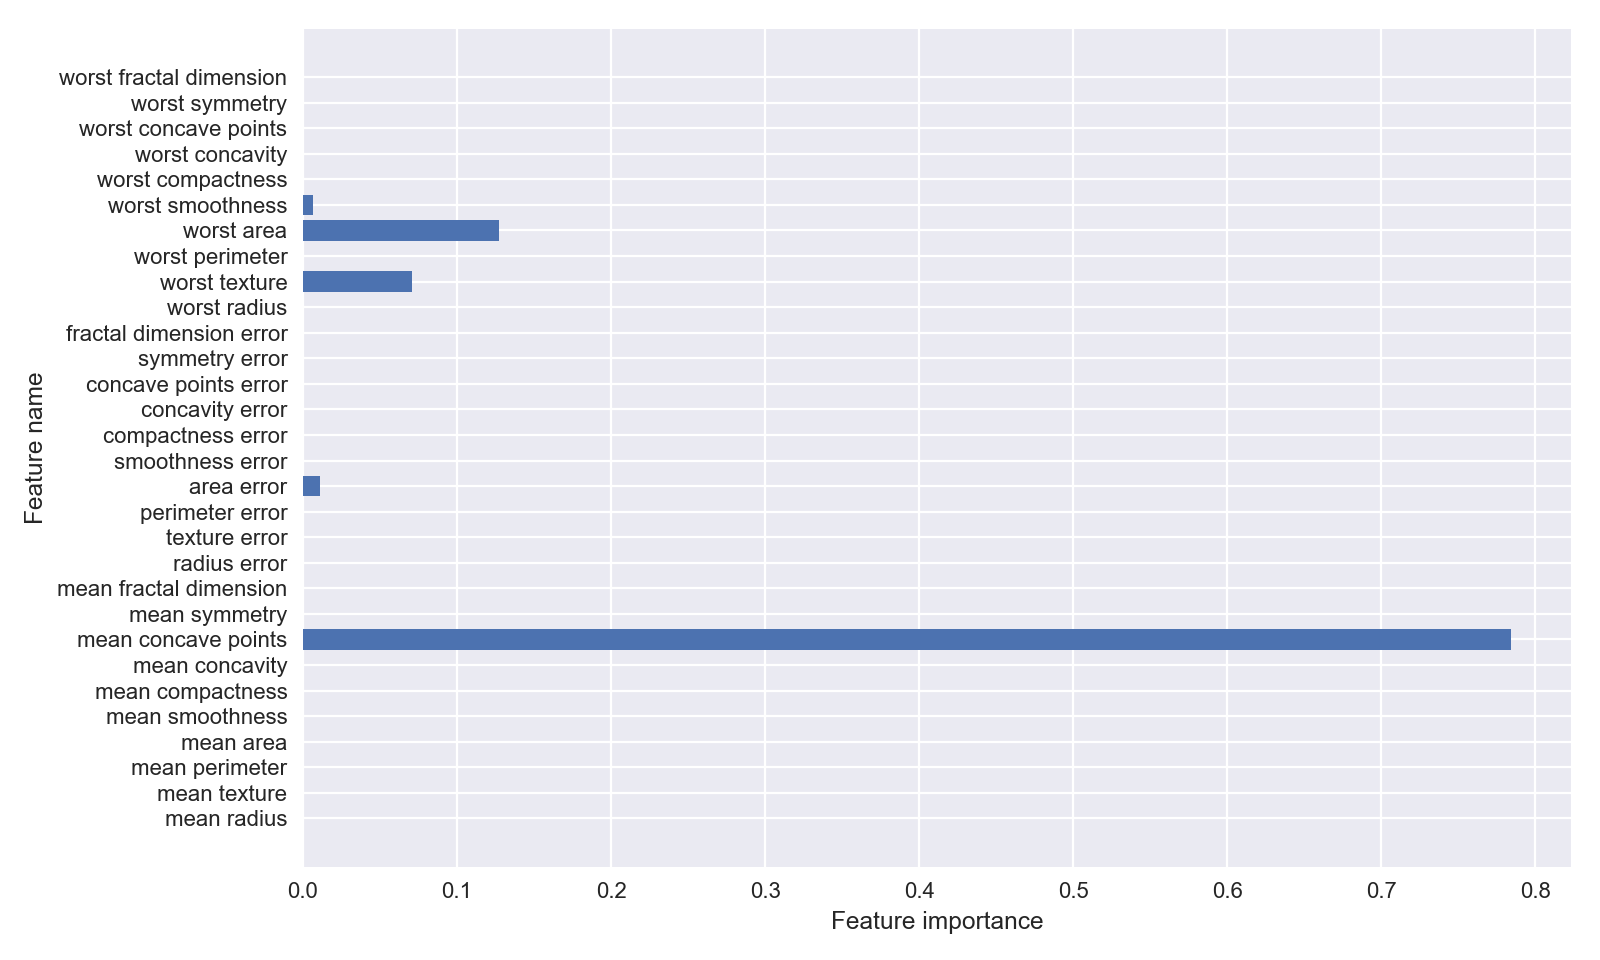

In [121]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

<img src="module2_trees_13.png" alt="jupyter" style="width: 600px;"/>
<img src="module2_trees_14.png" alt="jupyter" style="width: 600px;"/>

This article by Prof. Pedro Domingos provides a bit more background and discussion of the essential concepts in machine learning covered in Modules 1 and 2. It covers topics such as overfitting, the role of data vs model vs features, and the use of ensembles, where many models are learned instead of just one (something we look at with random forests).

[Domingos, P. (2012)](P.Domingos_Communications _ACM_55_10_78.pdf). A few useful things to know about machine learning. Communications of the ACM, 55(10), 78. doi:10.1145/2347736.2347755


This article by Ed Yong in The Scientist is an example of overfitting.. and its real-world consequences.

http://www.the-scientist.com/?articles.view/articleNo/38030/title/Genetic-Test-for-Autism-Refuted/
